<a href="https://colab.research.google.com/github/Parth-Parmar1/Parth-Parmar1/blob/main/2022_01_08_ParthParmar_CapstoneProject17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 16: House Price Prediction 

---

### Context

The price of the house depends on various factors like locality, connectivity, number of rooms, etc. Change in the mindset of the millennial generation also contributes to ups and down in house prices as the young generation is much into renting than to owe a house. Predicting the right price of the house is important for investors in the real estate business. This makes it very important to come up with proper and smart technique to estimate the true price of the house. 
 

---

#### Getting Started

Follow the steps described below to solve the project:

1. Click on the link provided below to open the Colab file for this project.
   
   https://colab.research.google.com/drive/1A8Ui9xG_ilL23kUKPj3Nd_XSyF-OBewR

2. Create the duplicate copy of the Colab file. Here are the steps to create the duplicate copy:

    - Click on the **File** menu. A new drop-down list will appear.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/0_file_menu.png' width=500>

    - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/1_create_colab_duplicate_copy.png' width=500>

     - After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_CapstoneProject17** format. 

3. Now, write your code in the prescribed code cells.

---

### Problem Statement


You are willing to sell your house. You are not sure about the price of your house and want to estimate its price. You are provided with the dataset and need to make a prediction model which will help you to get a good estimate of your house for selling it. 

---

### Data Description

The **housing** dataset contains the prices and other attributes. There are $545$ rows and $12$ attributes (features) with a target column (price). 

Following are the features:  

|Column|Description|
|---:|:---|
|`Price`|Price in INR|
|`area`|Area in square ft.|
|`bedrooms`|Number of bedrooms in the house|
|`bathrooms`|Number of bathrooms in the house|
|`stories`|Number of stores in the house|
|`mainroad`|Whether house is on main road or not(binary)|
|`guestroom`|Whether house have guestroom or not(binary)|
|`basement`|Whether house have basement or not(binary)|
|`airconditioning`|Whether house have airconditioning or not(binary)|
|`hotwaterheating`|Whether house have hotwaterheating or not(binary)|
|`parking`|Number of parking area|
|`prefarea`|Whether house have prefarea or not(binary)|
|`furnishingstatus`|Furnish status of the house|


  **Dataset Link:**  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv


---

### Things To Do

1. Explore the Housing dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes using feature encoding.

3. Build a linear regression model by selecting the most relevant features to predict the price of houses.

4. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.



---

#### 1. Import Modules and Load Dataset

**Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv








In [37]:
# Import the required modules and load the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [39]:
# Check if there are any NULL values.
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables. 

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`. 

- Create a normal distribution curve for the `price`.


In [40]:
# Check categorical attributes
df_categorical=df.select_dtypes(include=['object'])
df_categorical

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


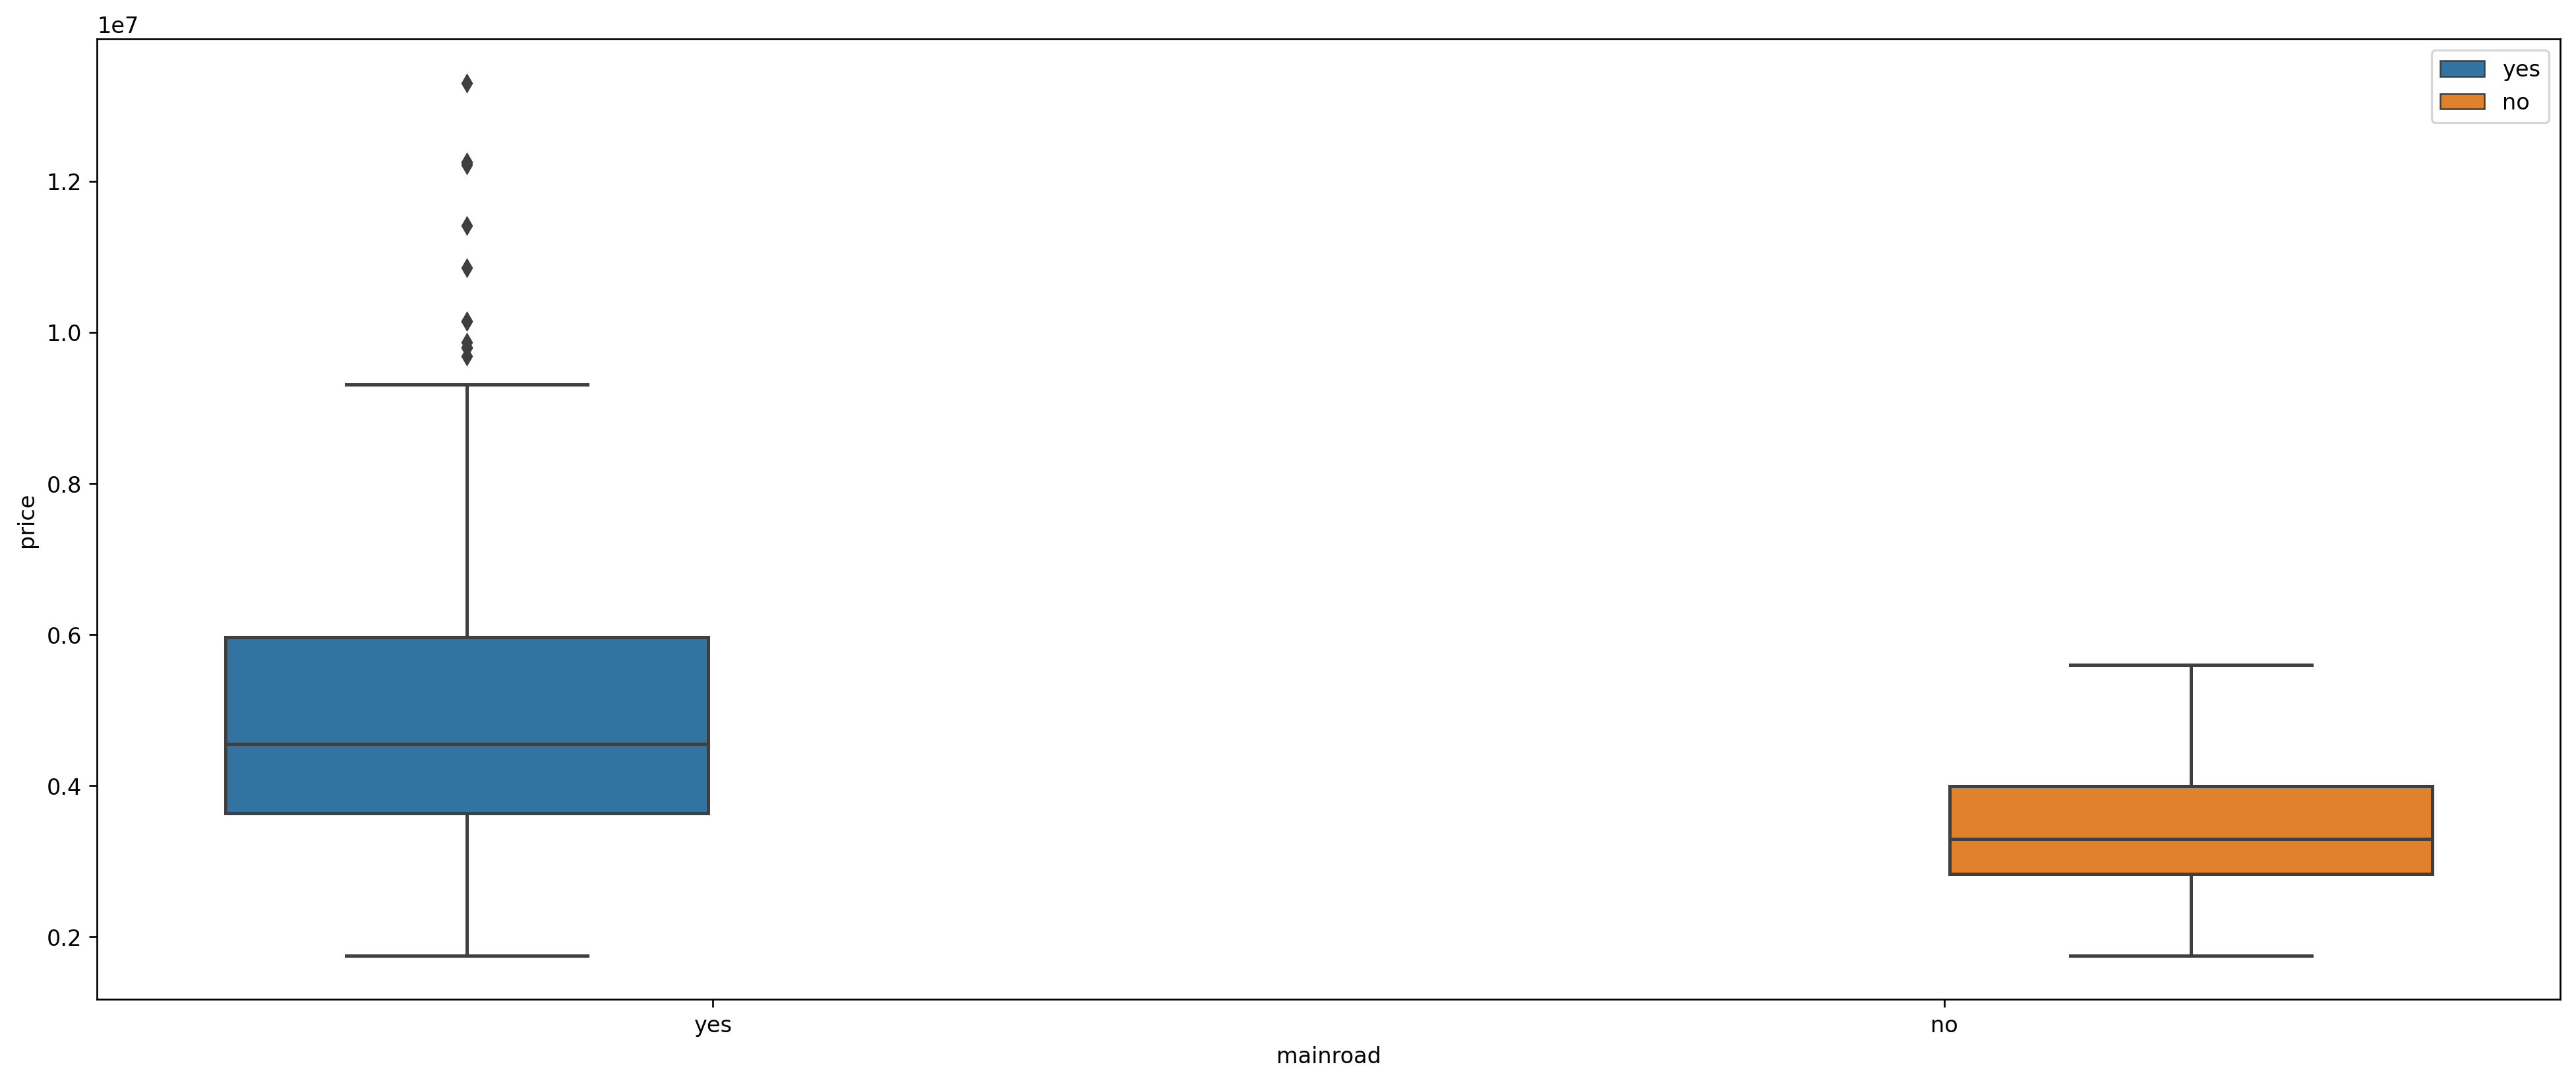

In [41]:
# Boxplot for 'mainroad' vs 'price'
plt.figure(figsize=(20,8),dpi=241)
sns.boxplot(df['mainroad'],df['price'],hue=df['mainroad'])
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


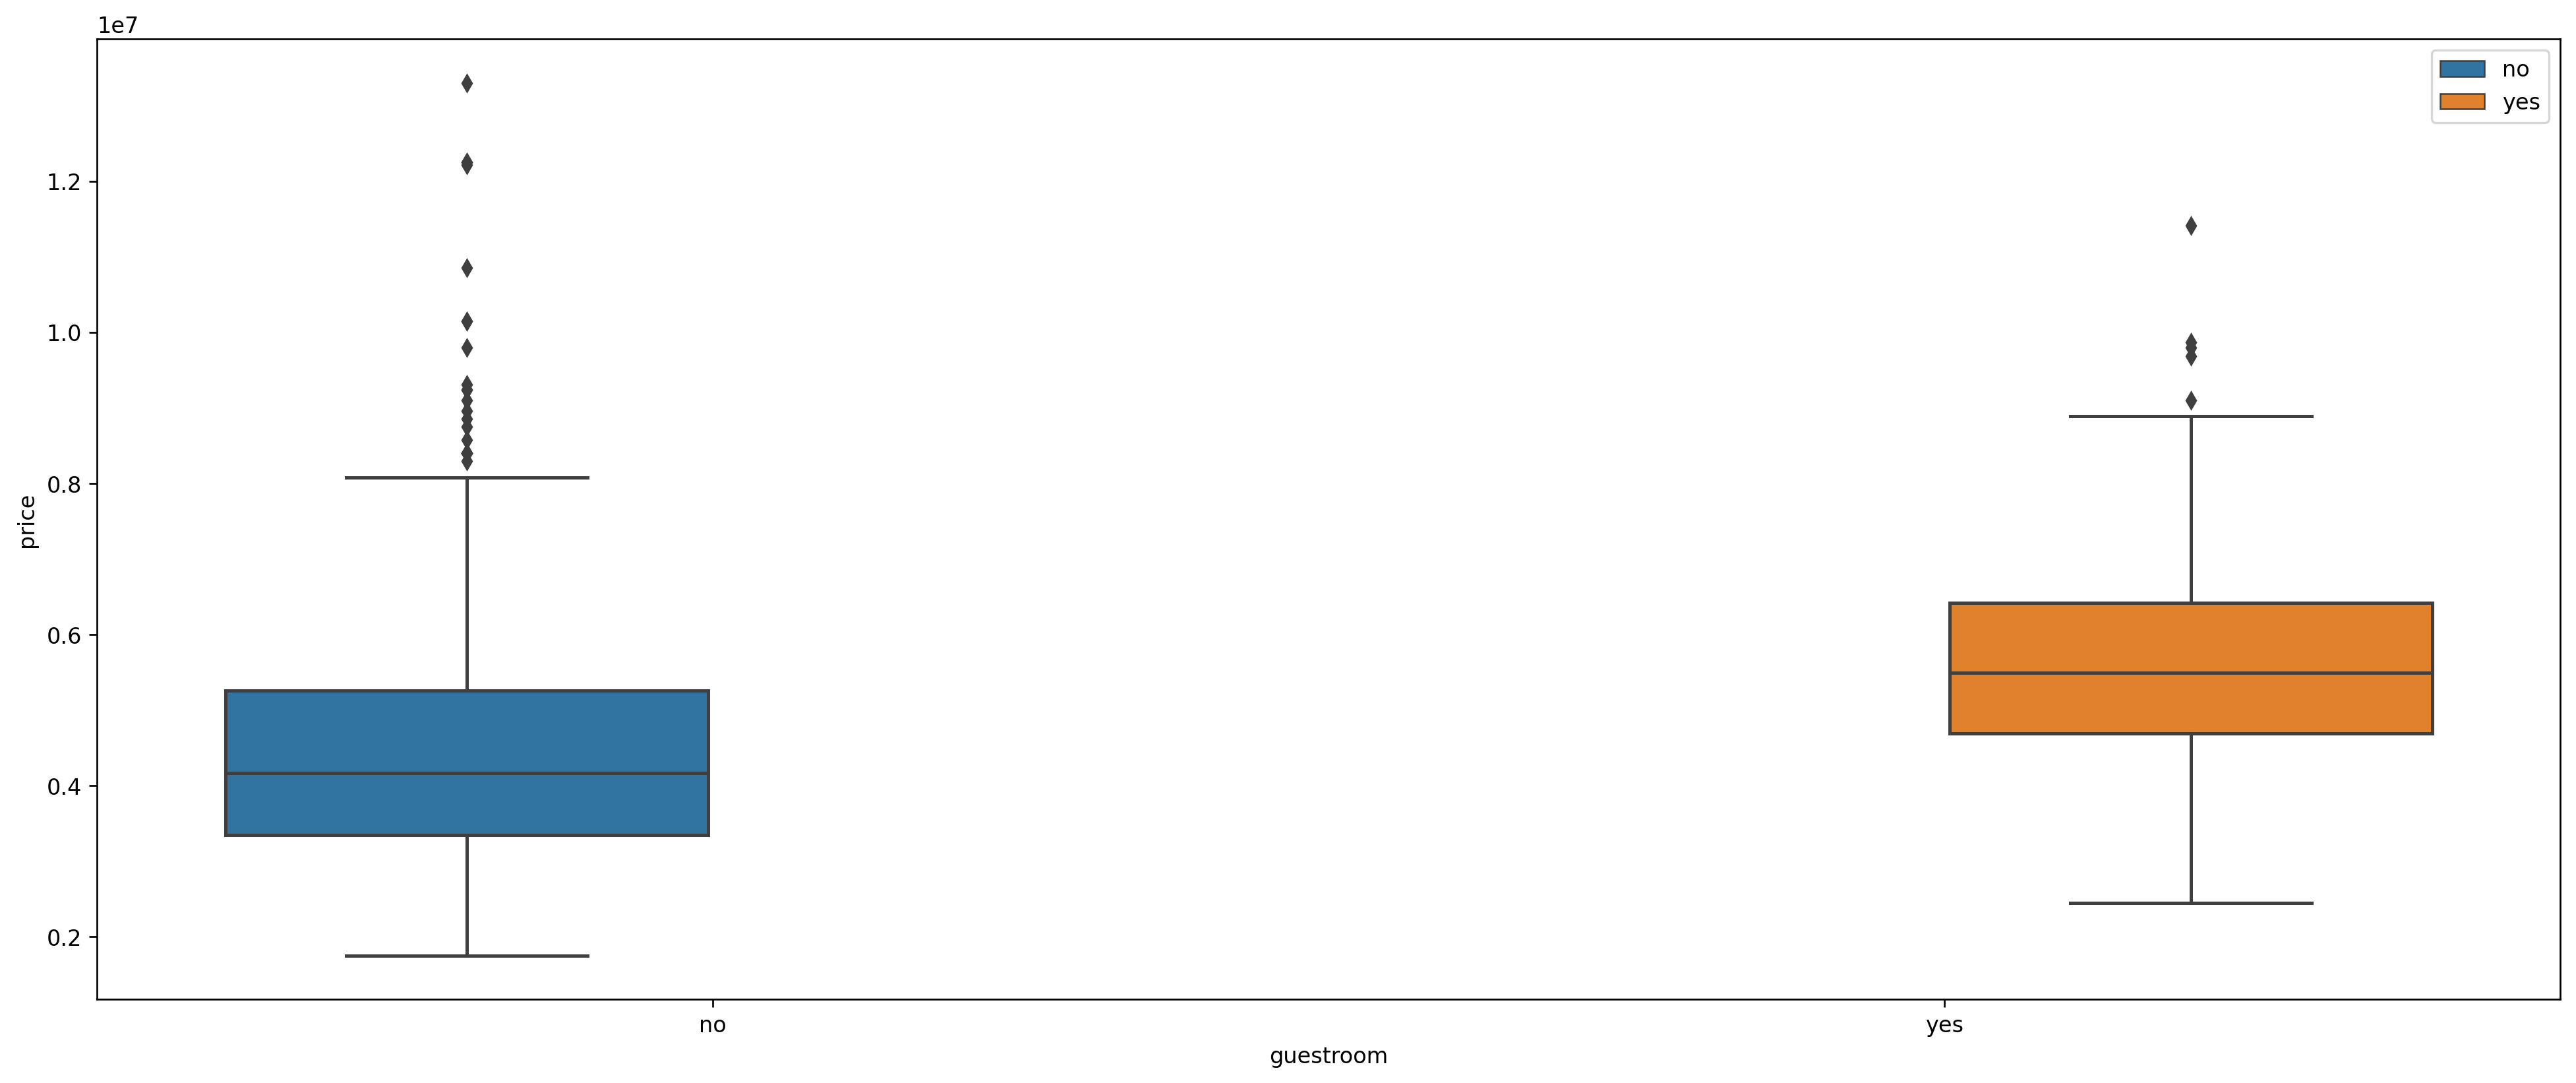

In [42]:
# Boxplot for 'guestroom' vs 'price'
plt.figure(figsize=(20,8),dpi=241)
sns.boxplot(df['guestroom'],df['price'],hue=df['guestroom'])
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


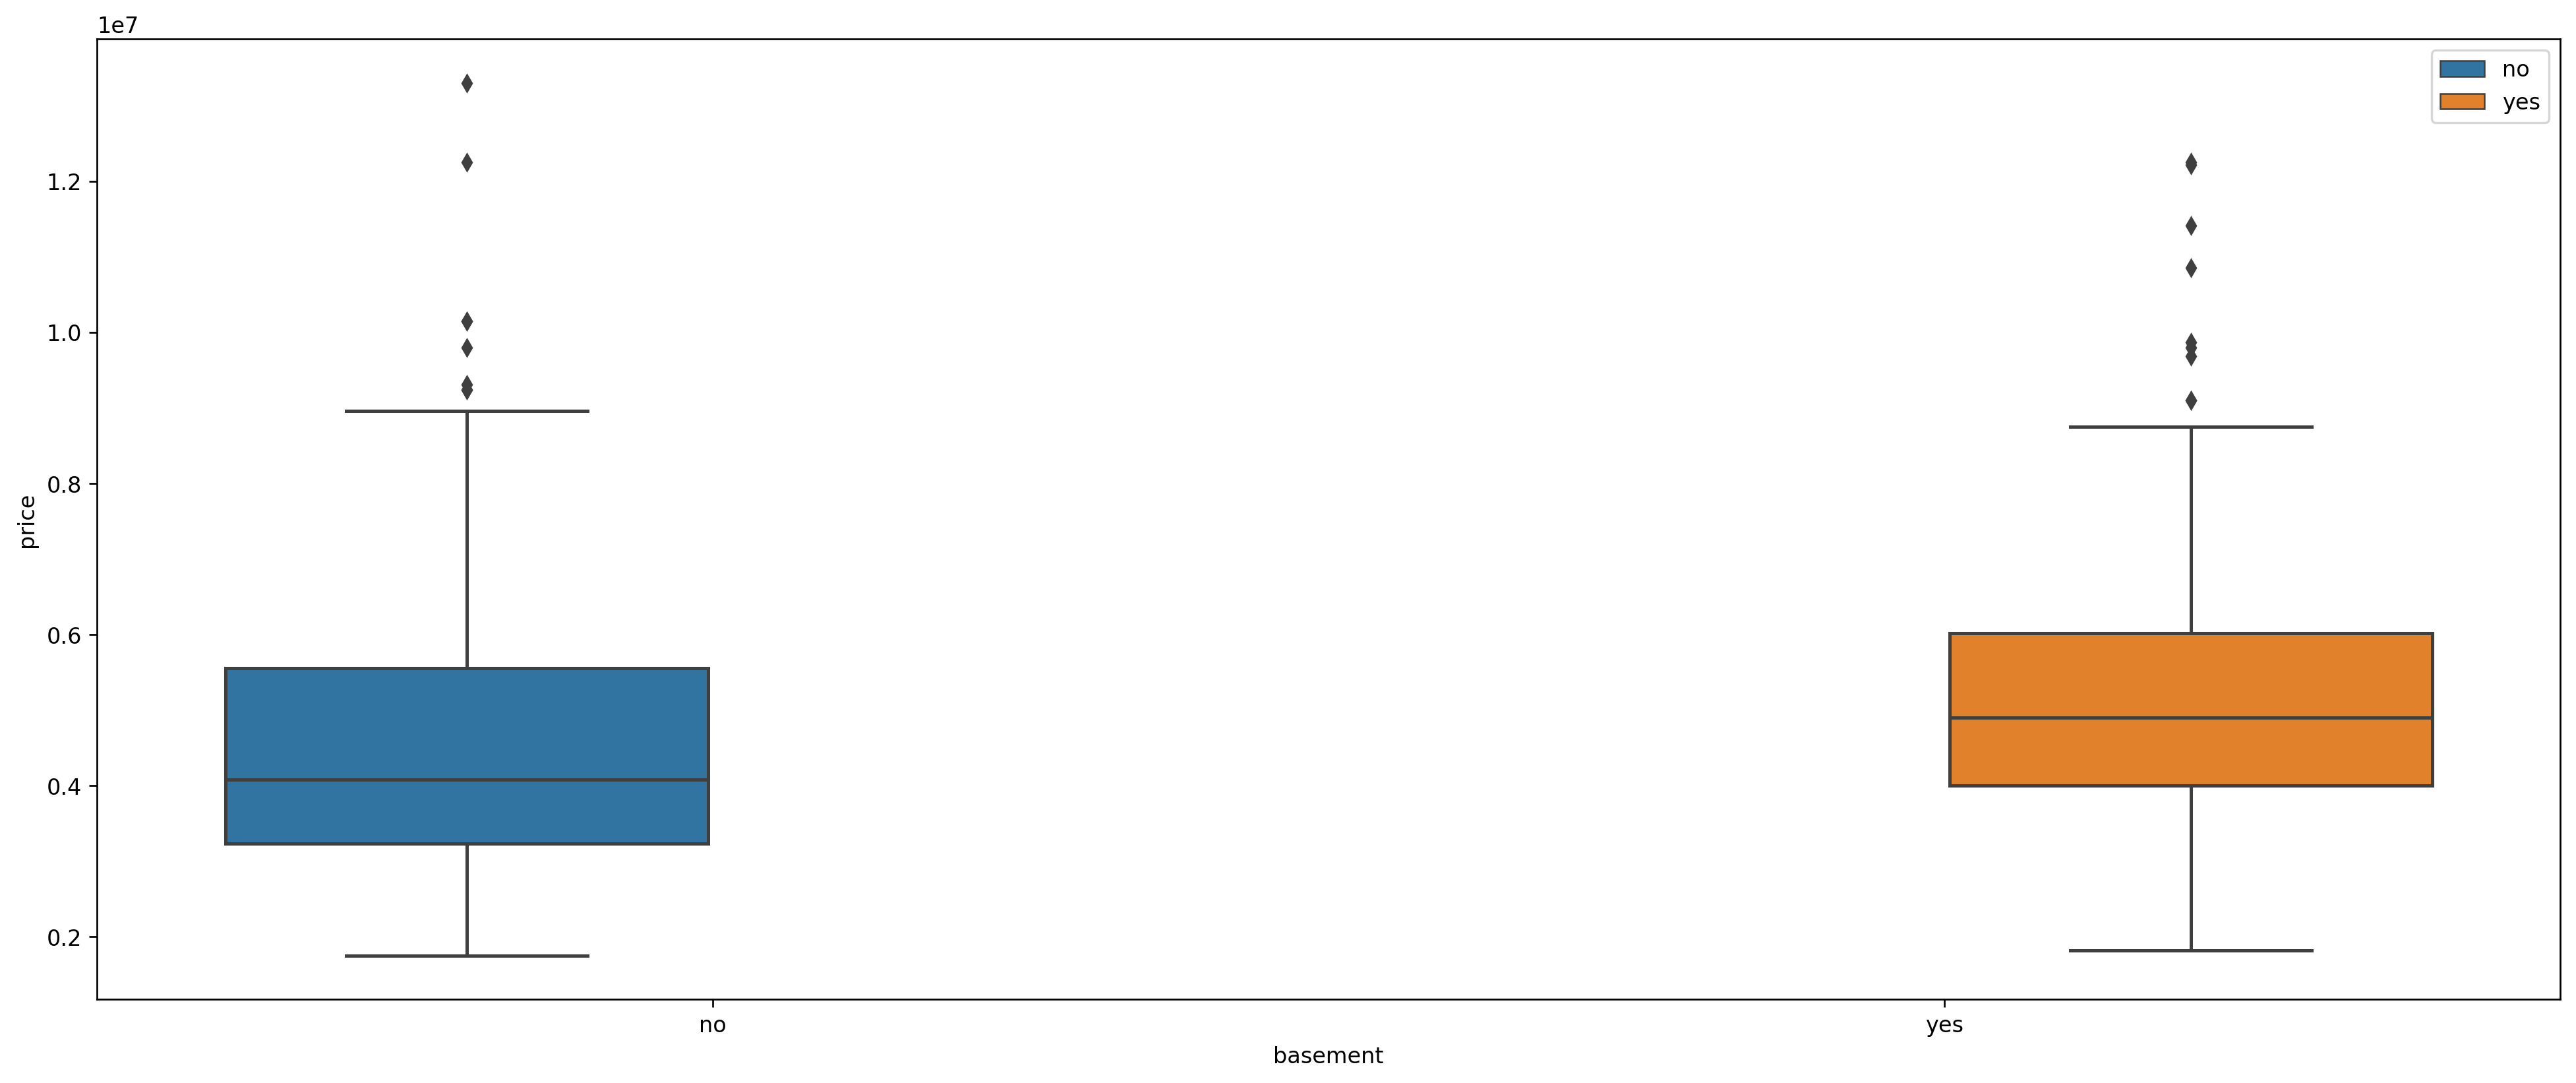

In [43]:
# Boxplot for 'basement' vs 'price'
plt.figure(figsize=(20,8),dpi=241)
sns.boxplot(df['basement'],df['price'],hue=df['basement'])
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


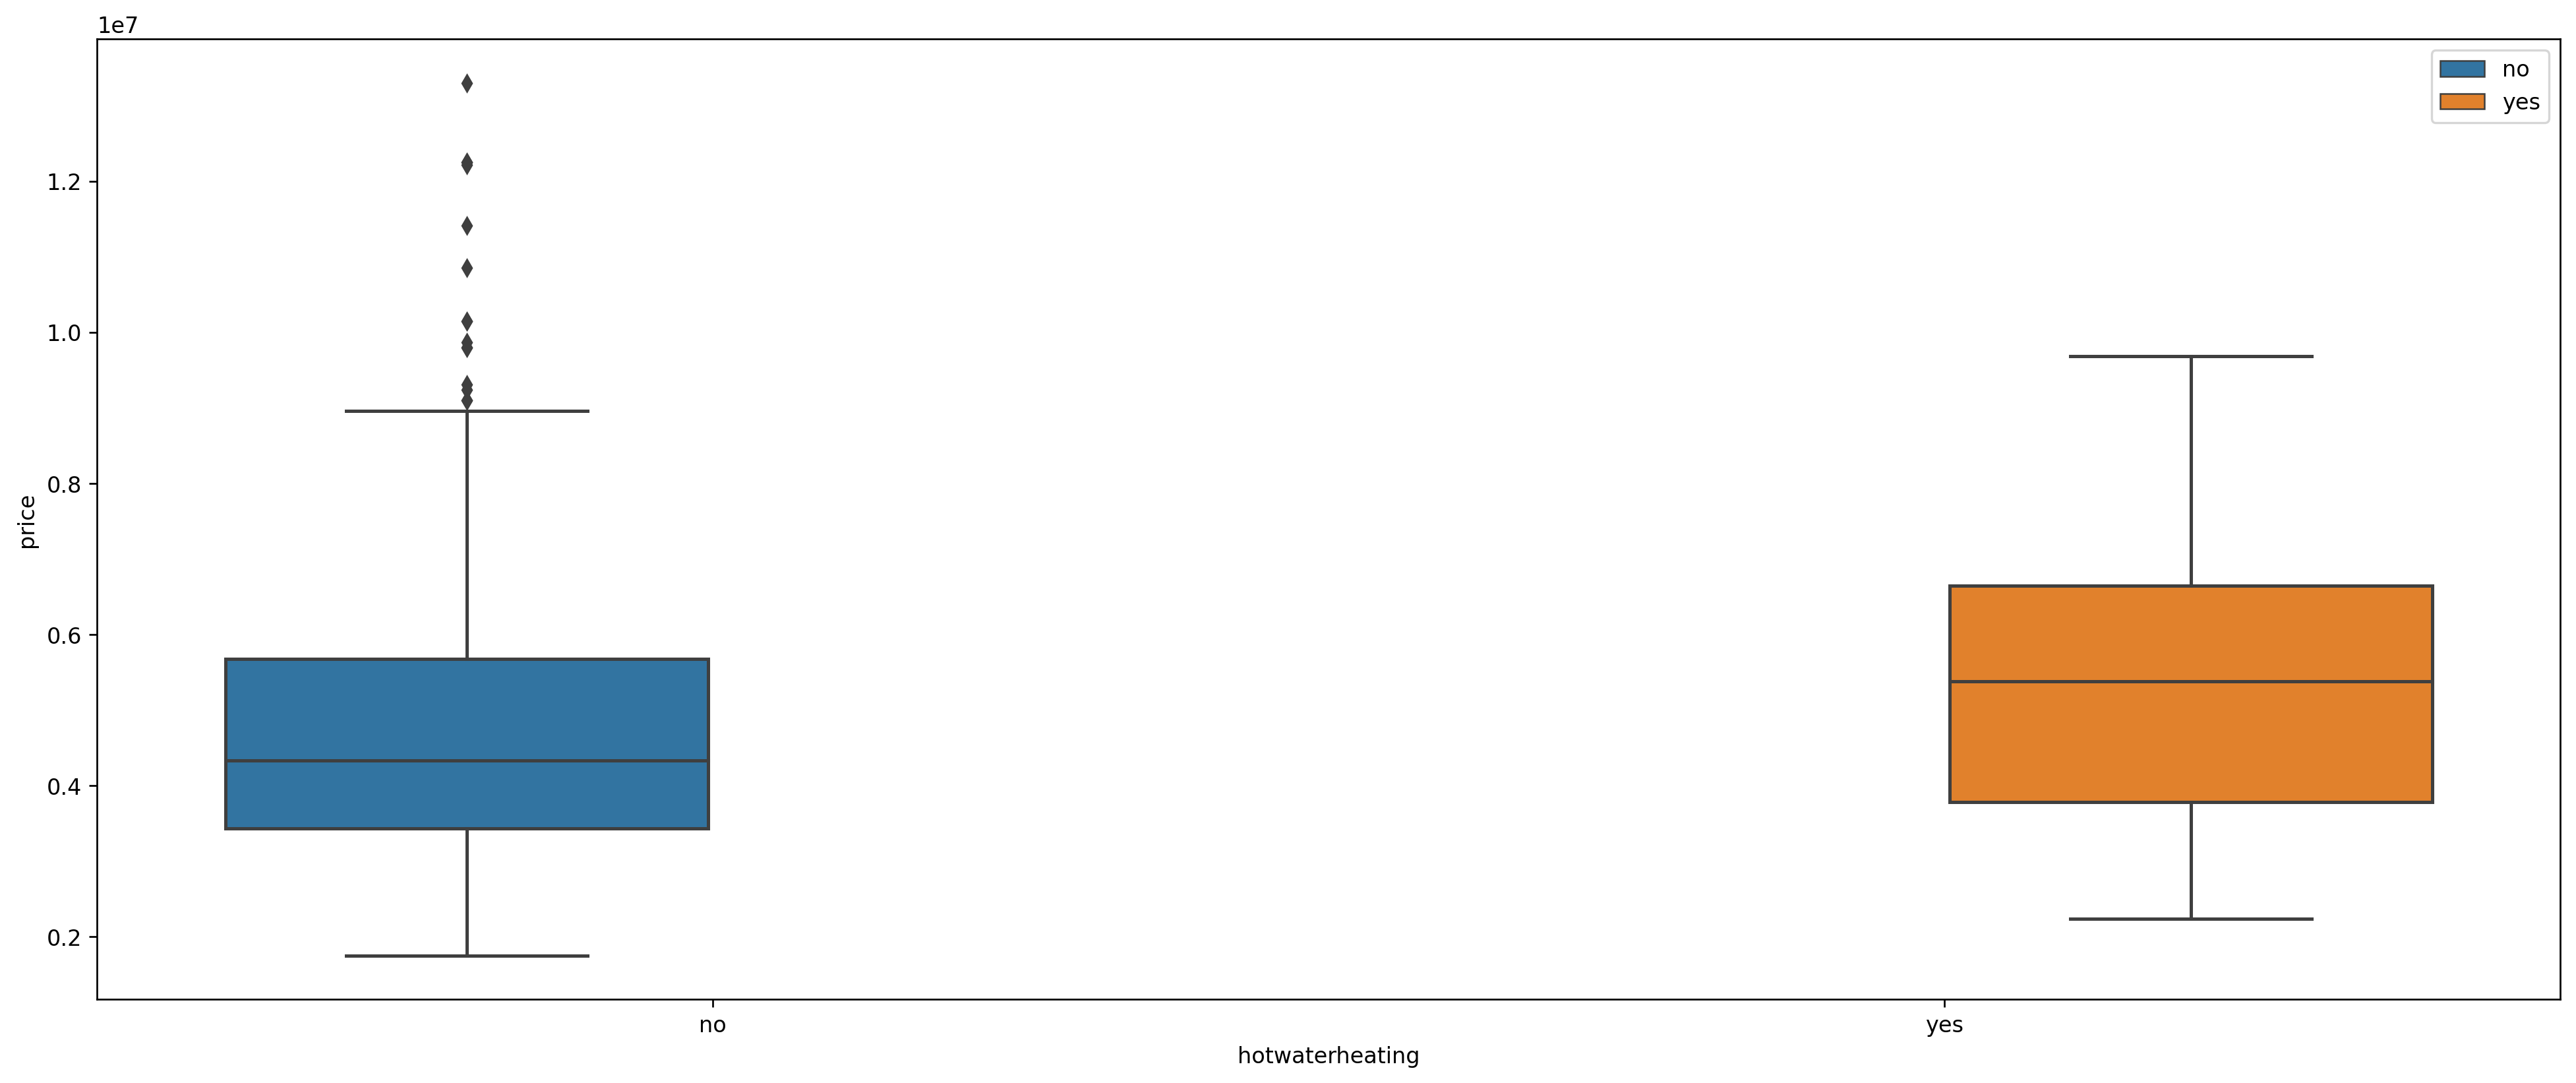

In [44]:
# Boxplot for 'hotwaterheating' vs 'price'
plt.figure(figsize=(20,8),dpi=241)
sns.boxplot(df['hotwaterheating'],df['price'],hue=df['hotwaterheating'])
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


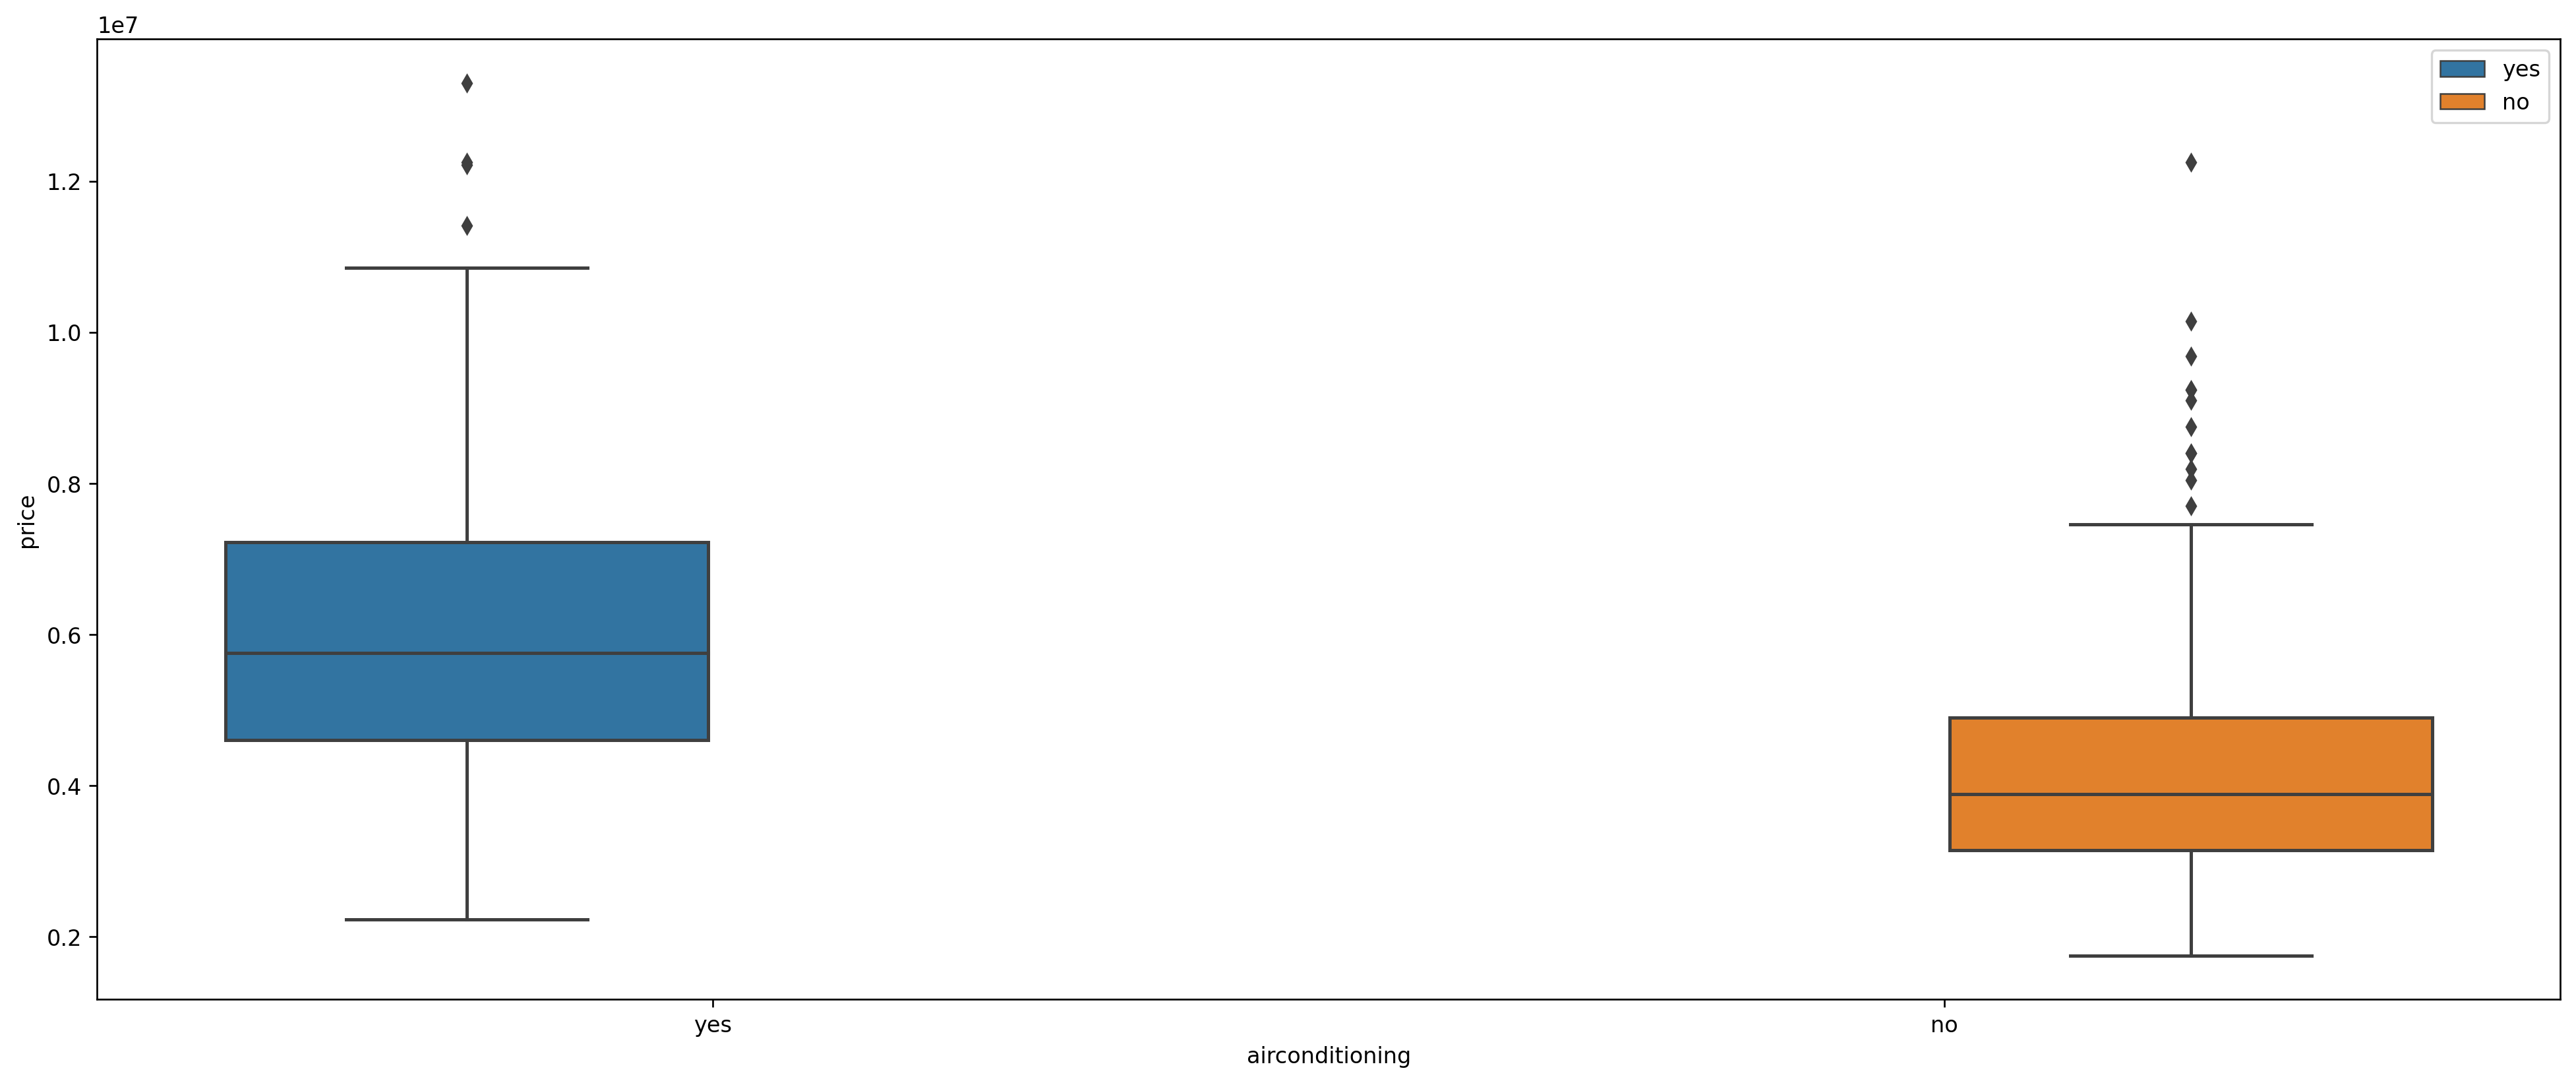

In [45]:
# Boxplot for 'airconditioning' vs 'price'
plt.figure(figsize=(20,8),dpi=241)
sns.boxplot(df['airconditioning'],df['price'],hue=df['airconditioning'])
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


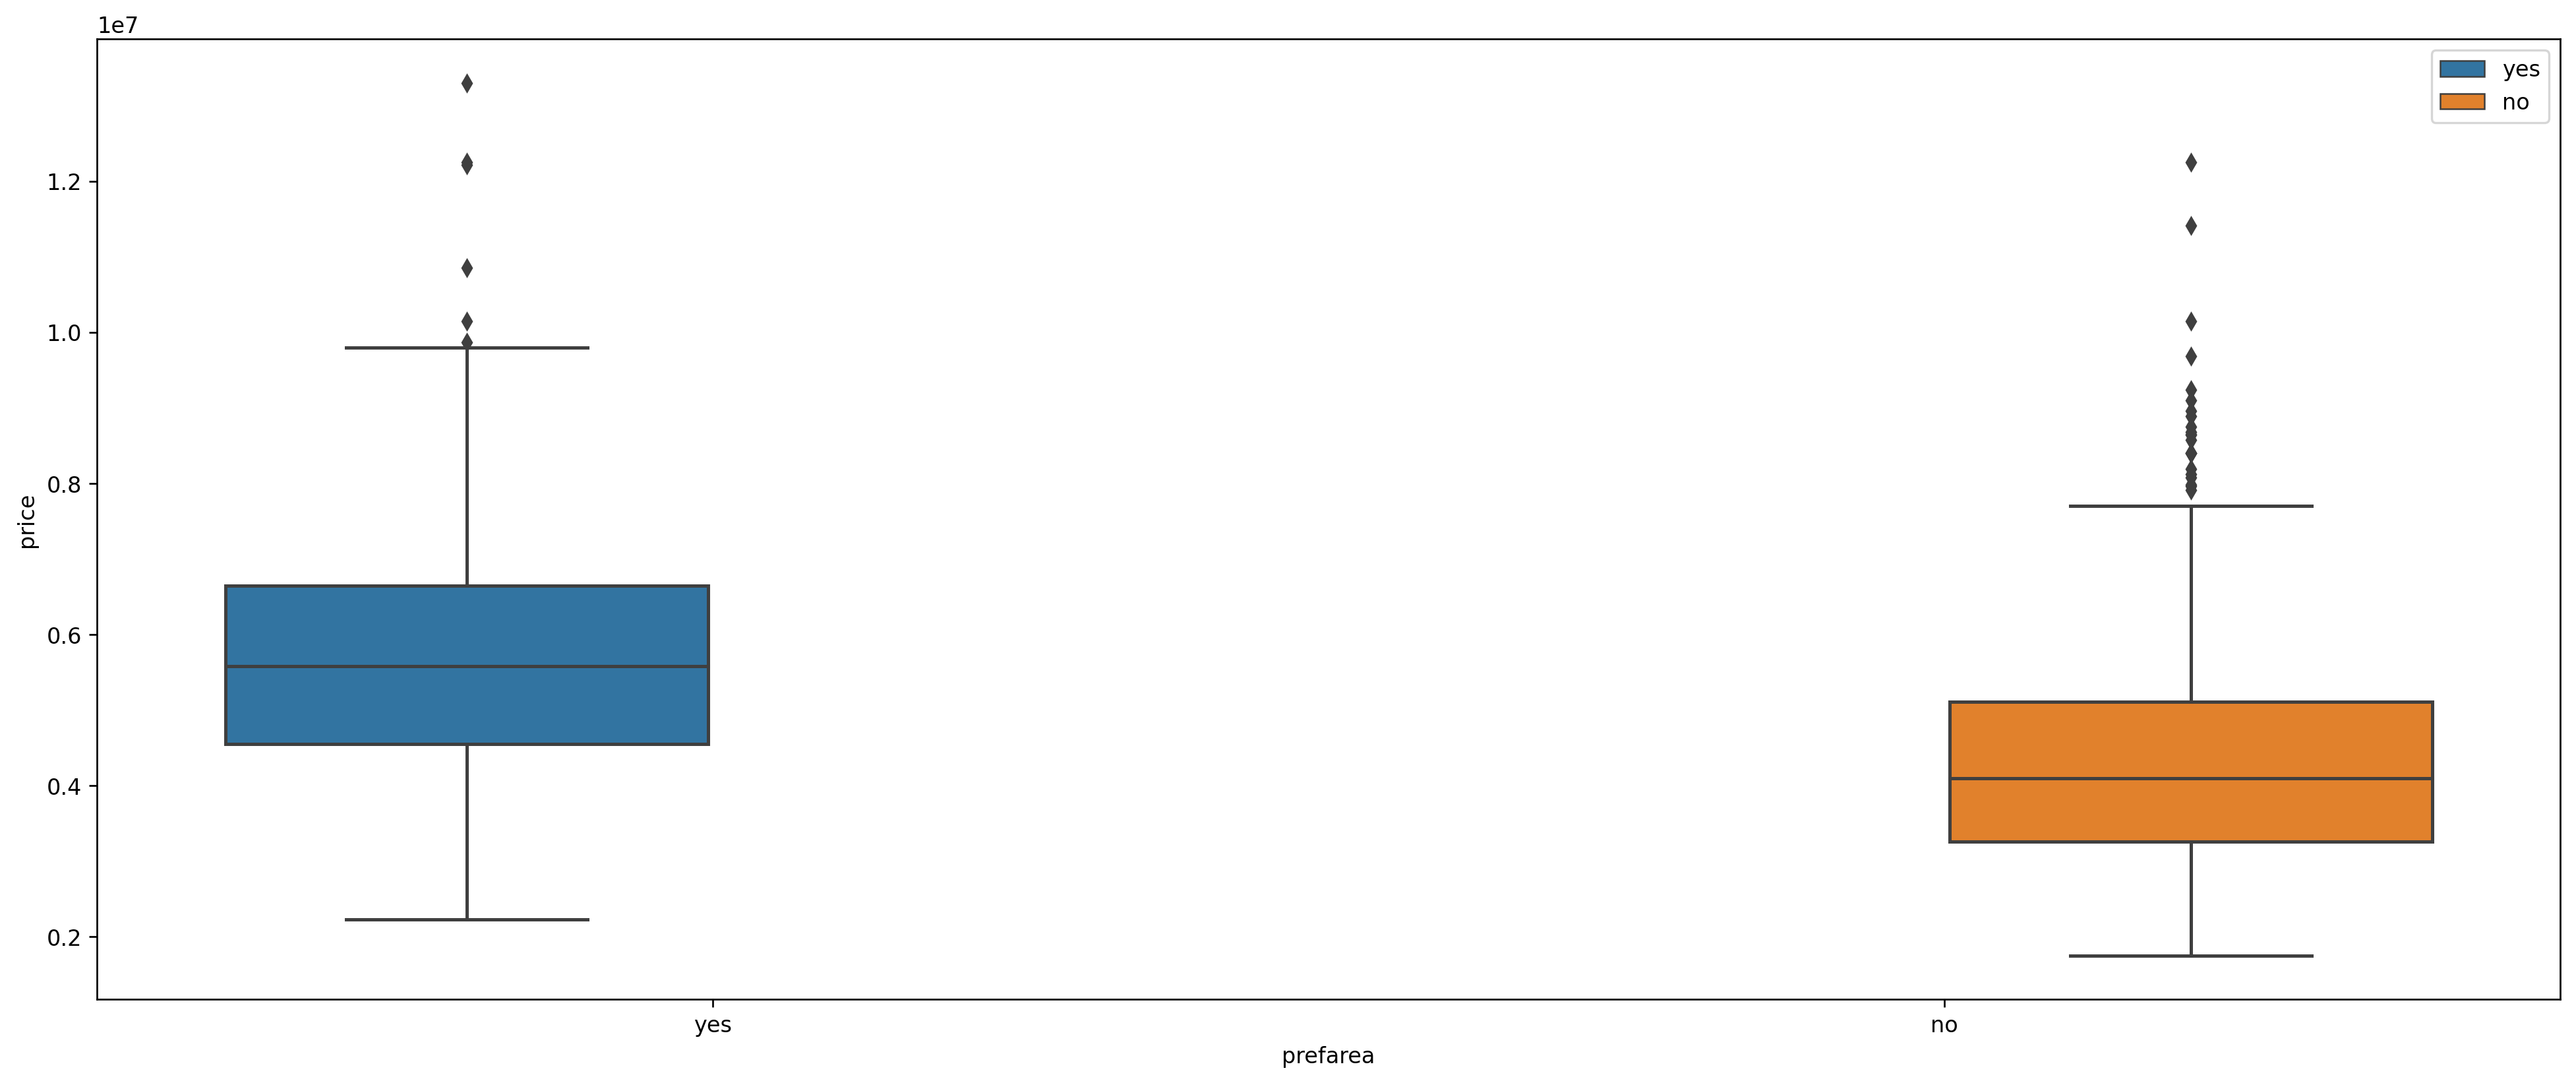

In [46]:
# Boxplot for 'prefarea' vs 'price'

plt.figure(figsize=(20,8),dpi=241)
sns.boxplot(df['prefarea'],df['price'],hue=df['prefarea'])
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


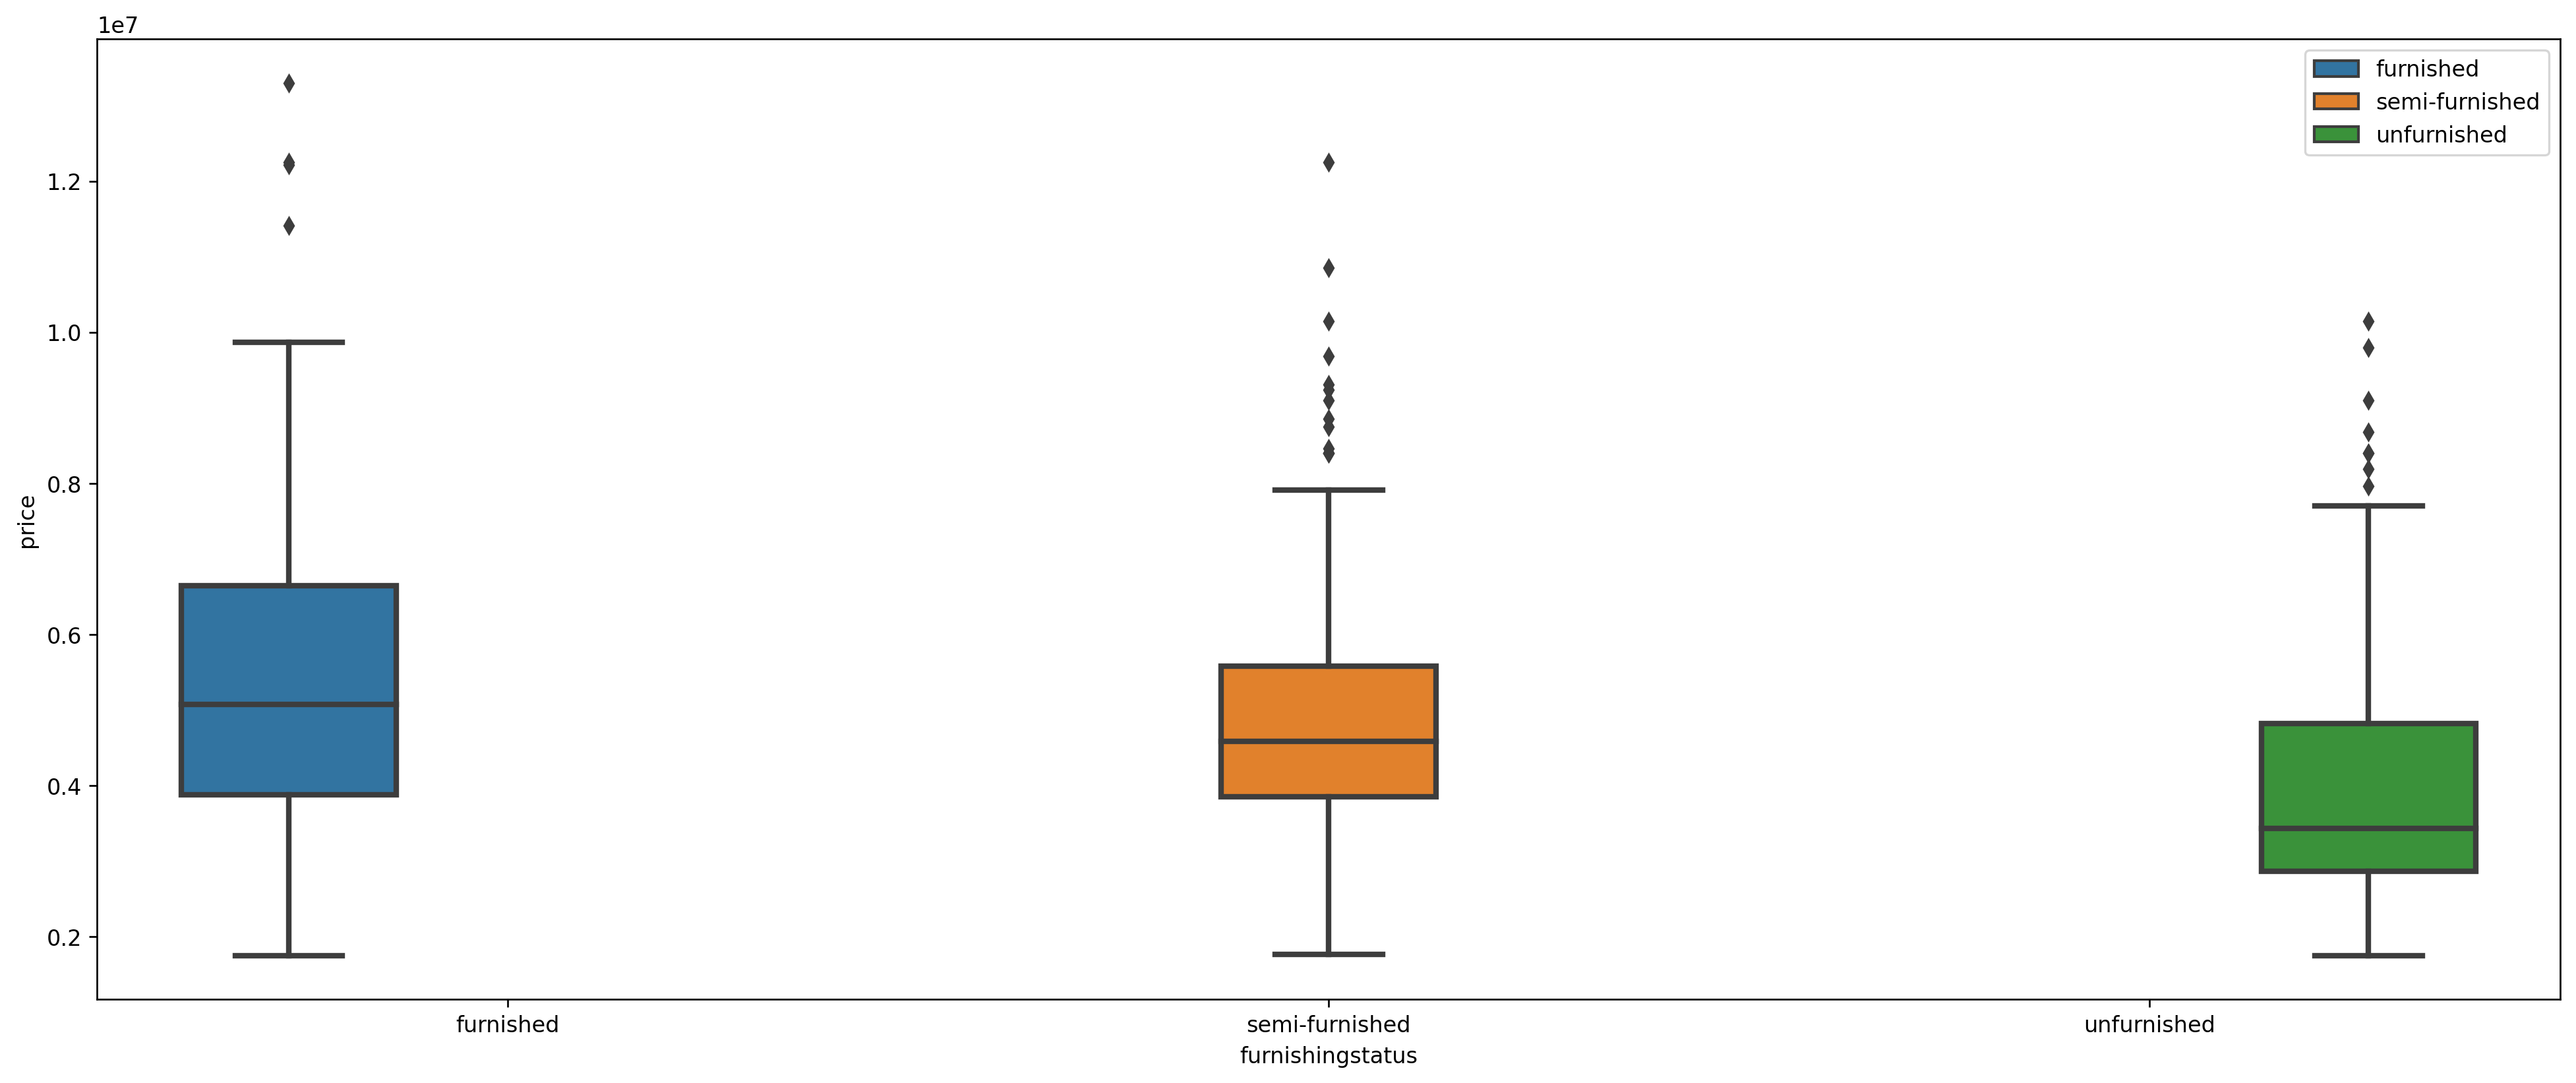

In [47]:
# Boxplot for 'furnishingstatus' vs 'price'
plt.figure(figsize=(20,8),dpi=241)
sns.boxplot(df['furnishingstatus'],df['price'],hue=df['furnishingstatus'],linewidth=2.5)
plt.legend()
plt.show()

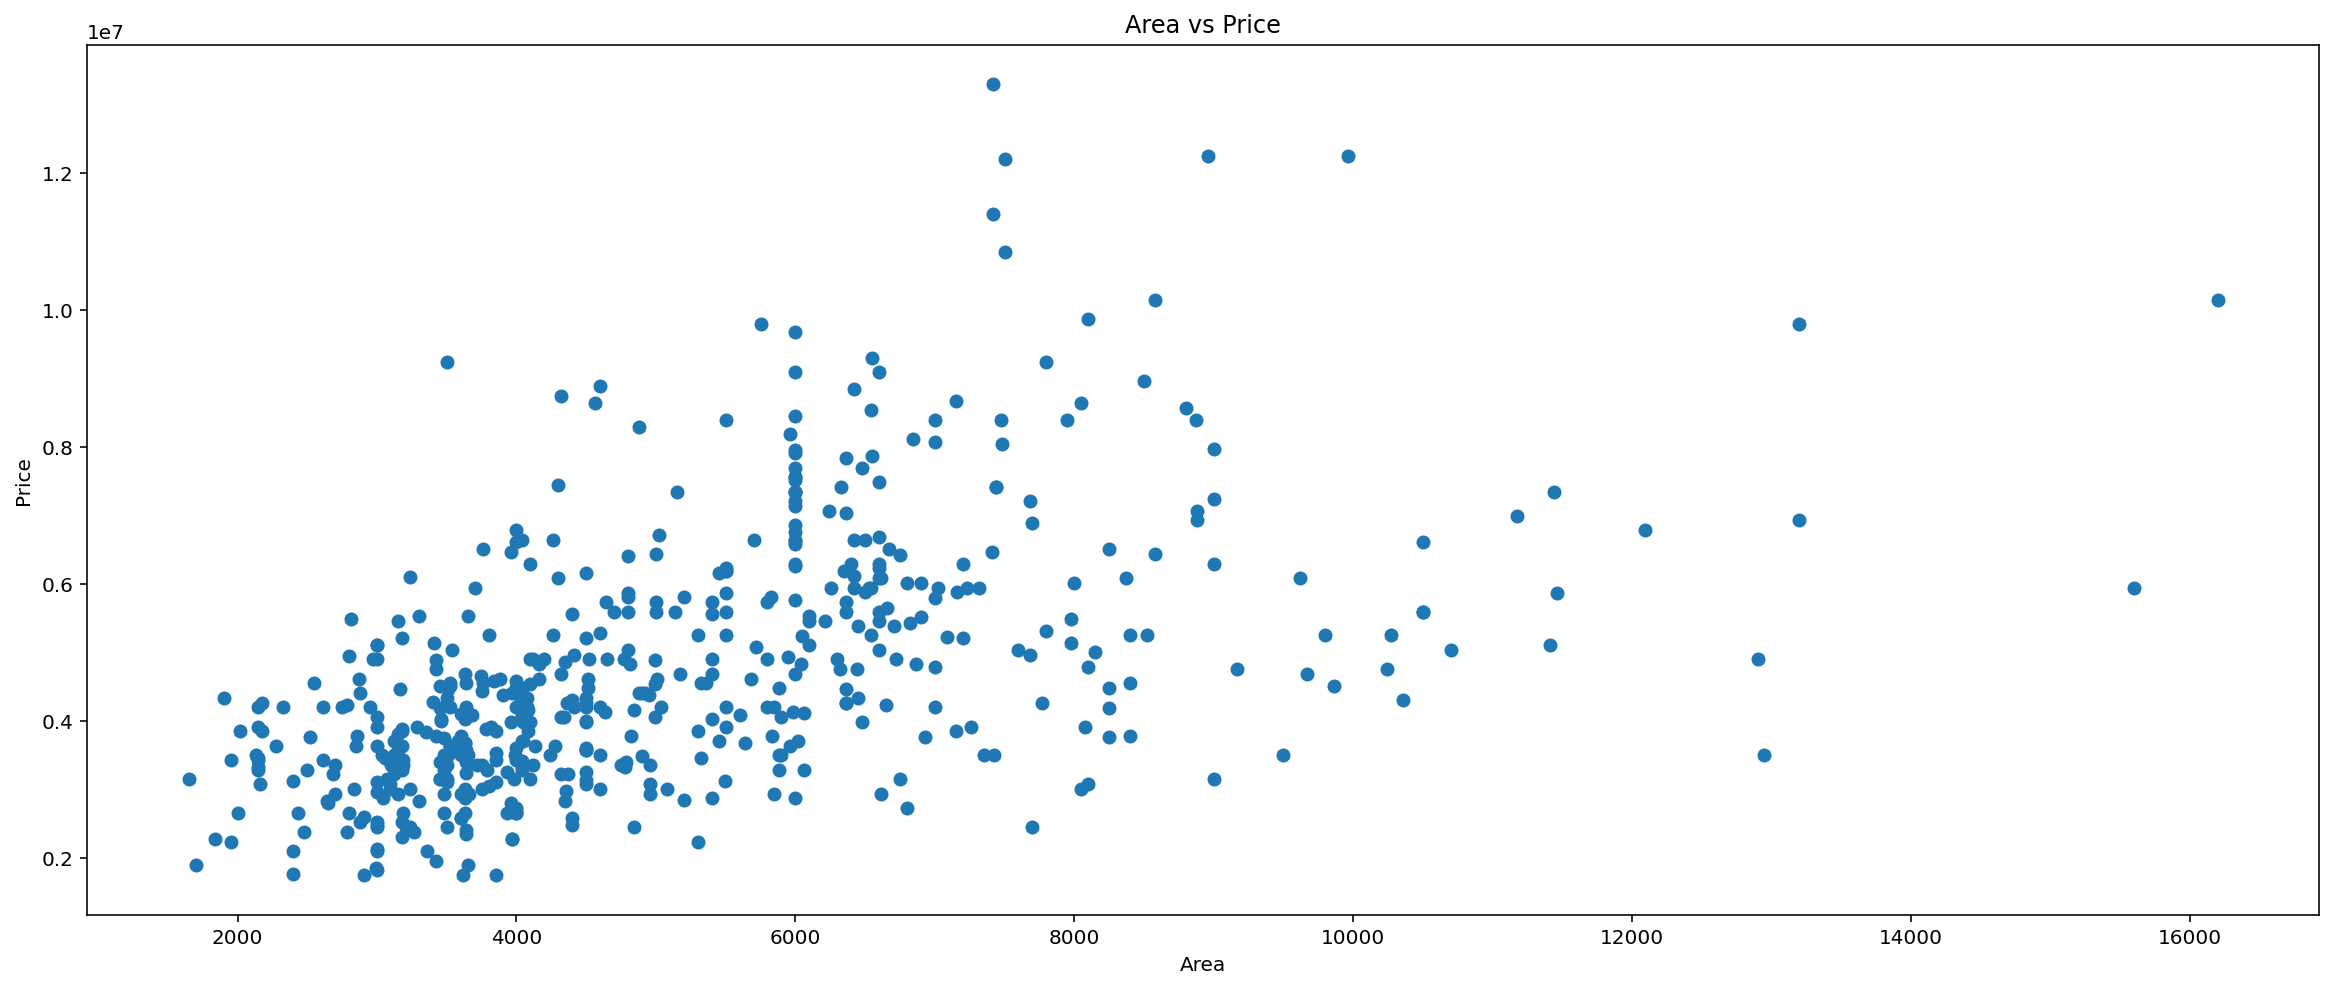

In [48]:
# Create scatter plot with 'area' on X-axis and 'price' on Y-axis
plt.figure(figsize=(20,8),dpi=144)
plt.scatter(df['area'],df['price'])
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


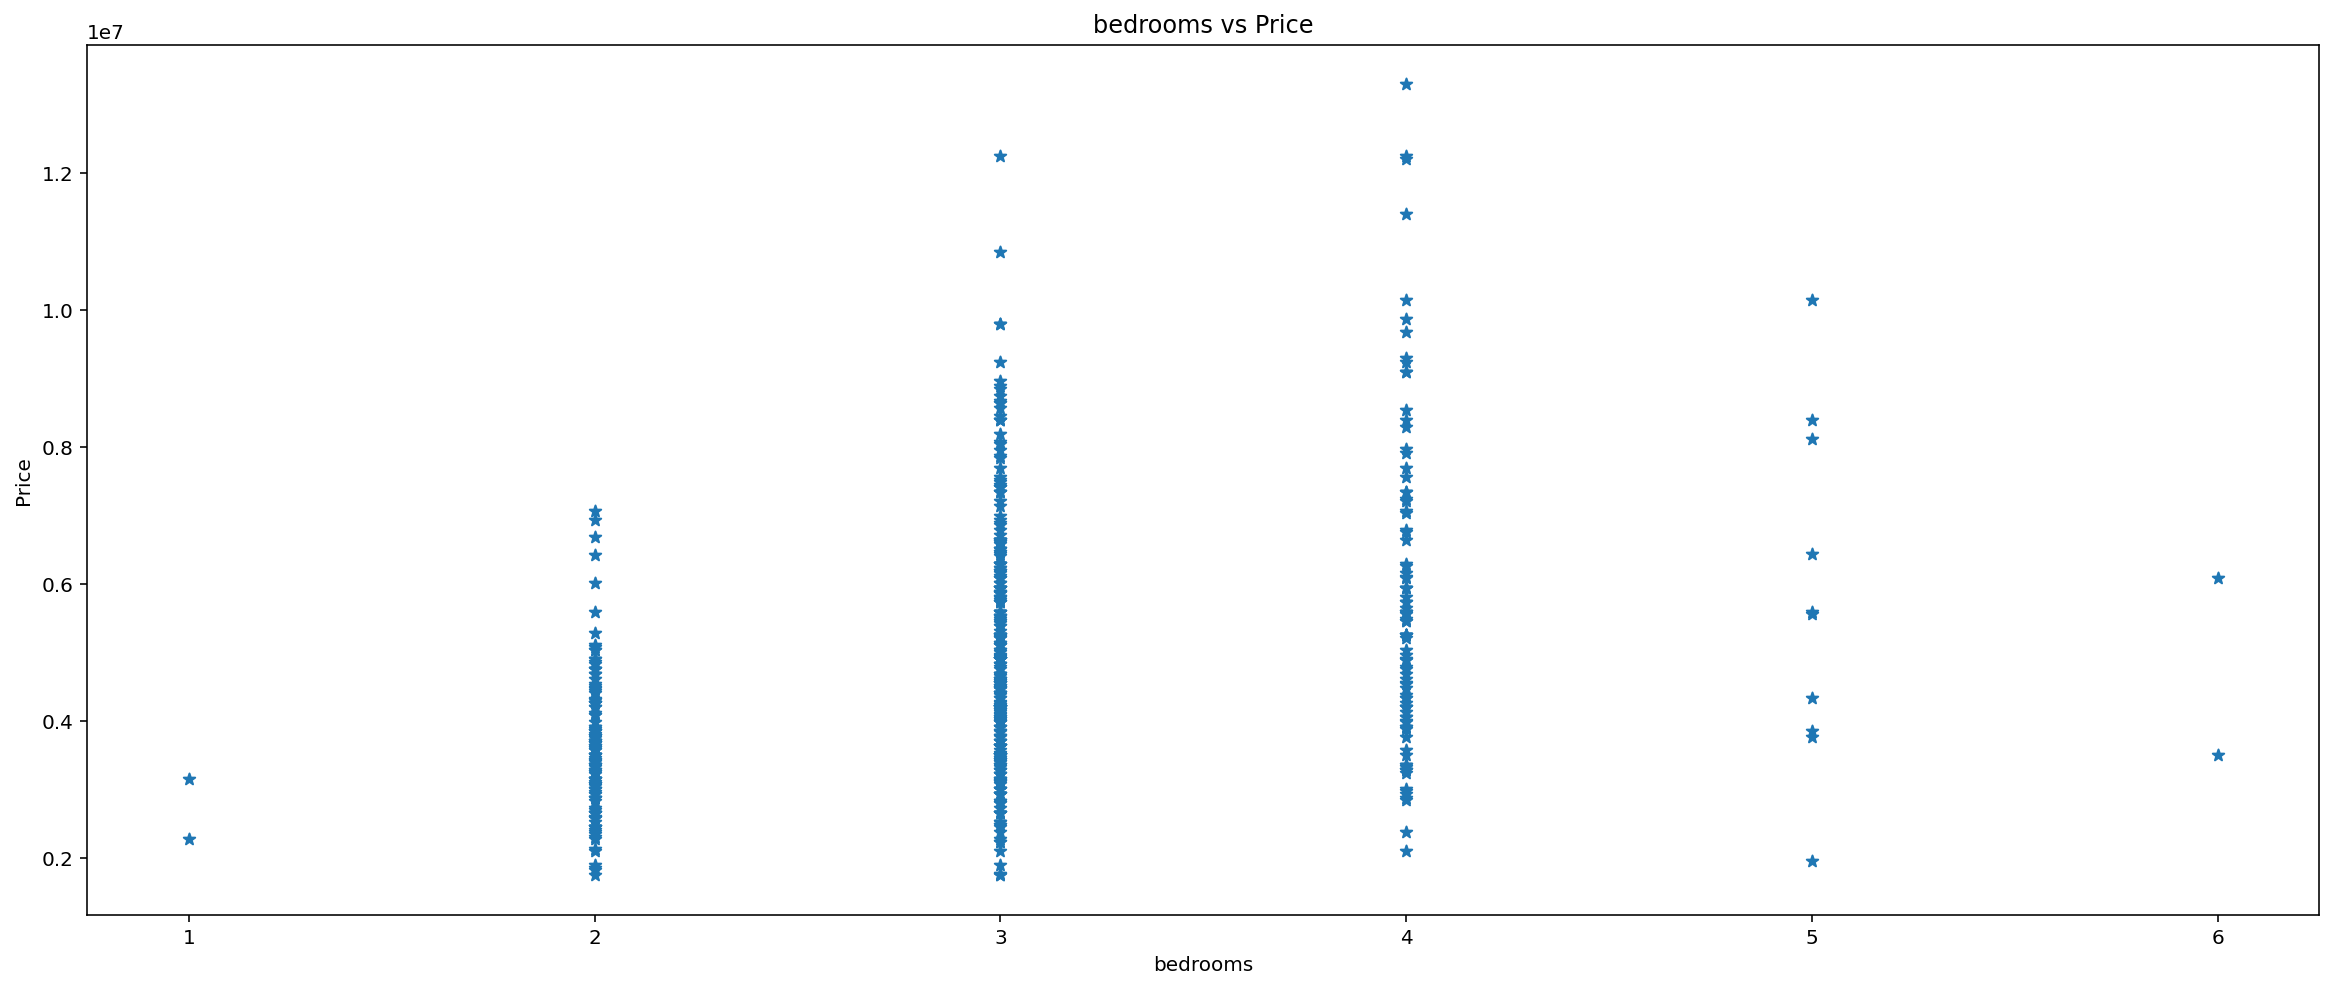

In [49]:
# Create scatter plot with 'bedrooms' on X-axis and 'price' on Y-axis
plt.figure(figsize=(20,8),dpi=144)
plt.scatter(df['bedrooms'],df['price'],marker='*')
plt.title('bedrooms vs Price')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()


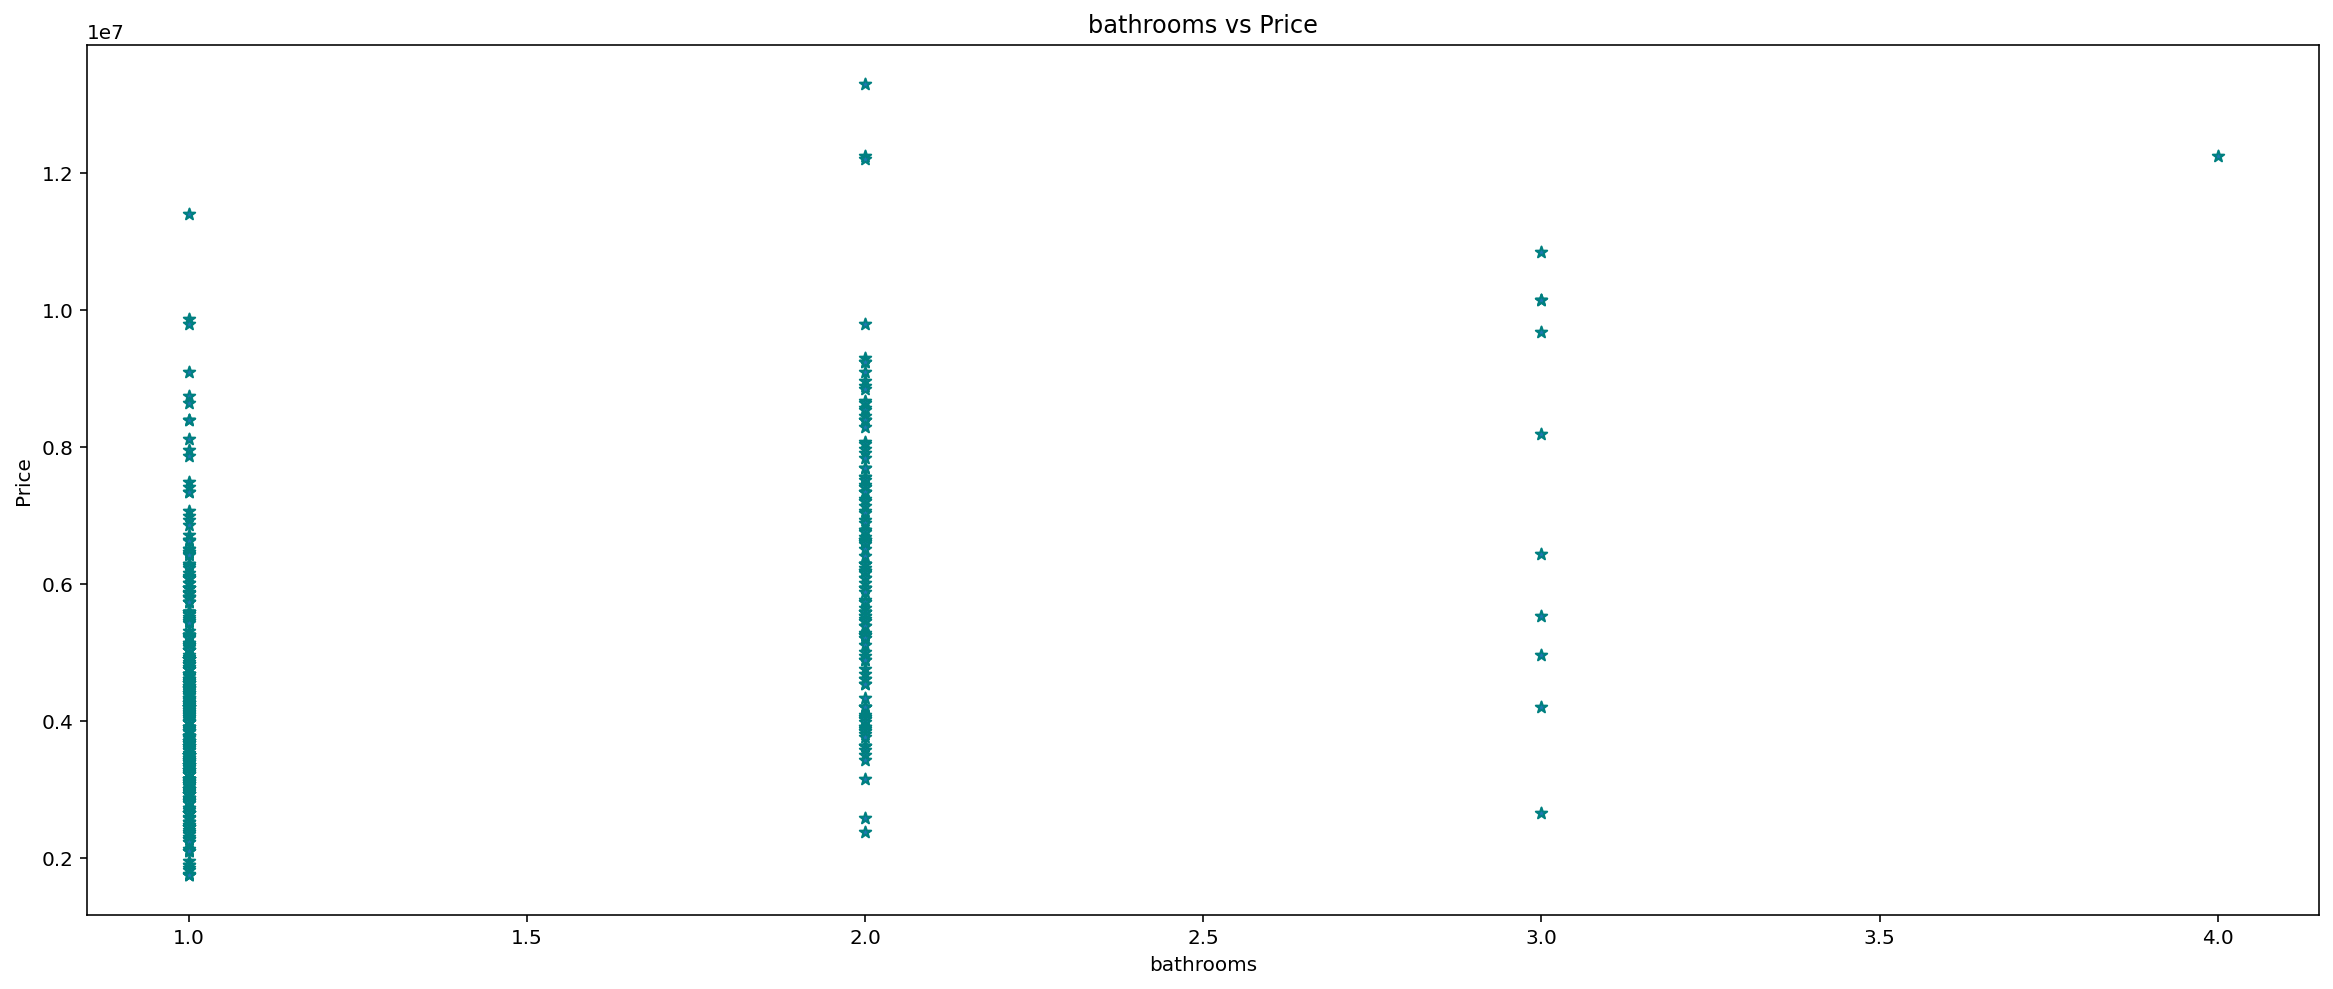

In [50]:
# Create scatter plot with 'bathrooms' on X-axis and 'price' on Y-axis
plt.figure(figsize=(20,8),dpi=144)
plt.scatter(df['bathrooms'],df['price'],marker='*',edgecolors='teal')
plt.title('bathrooms vs Price')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.show()


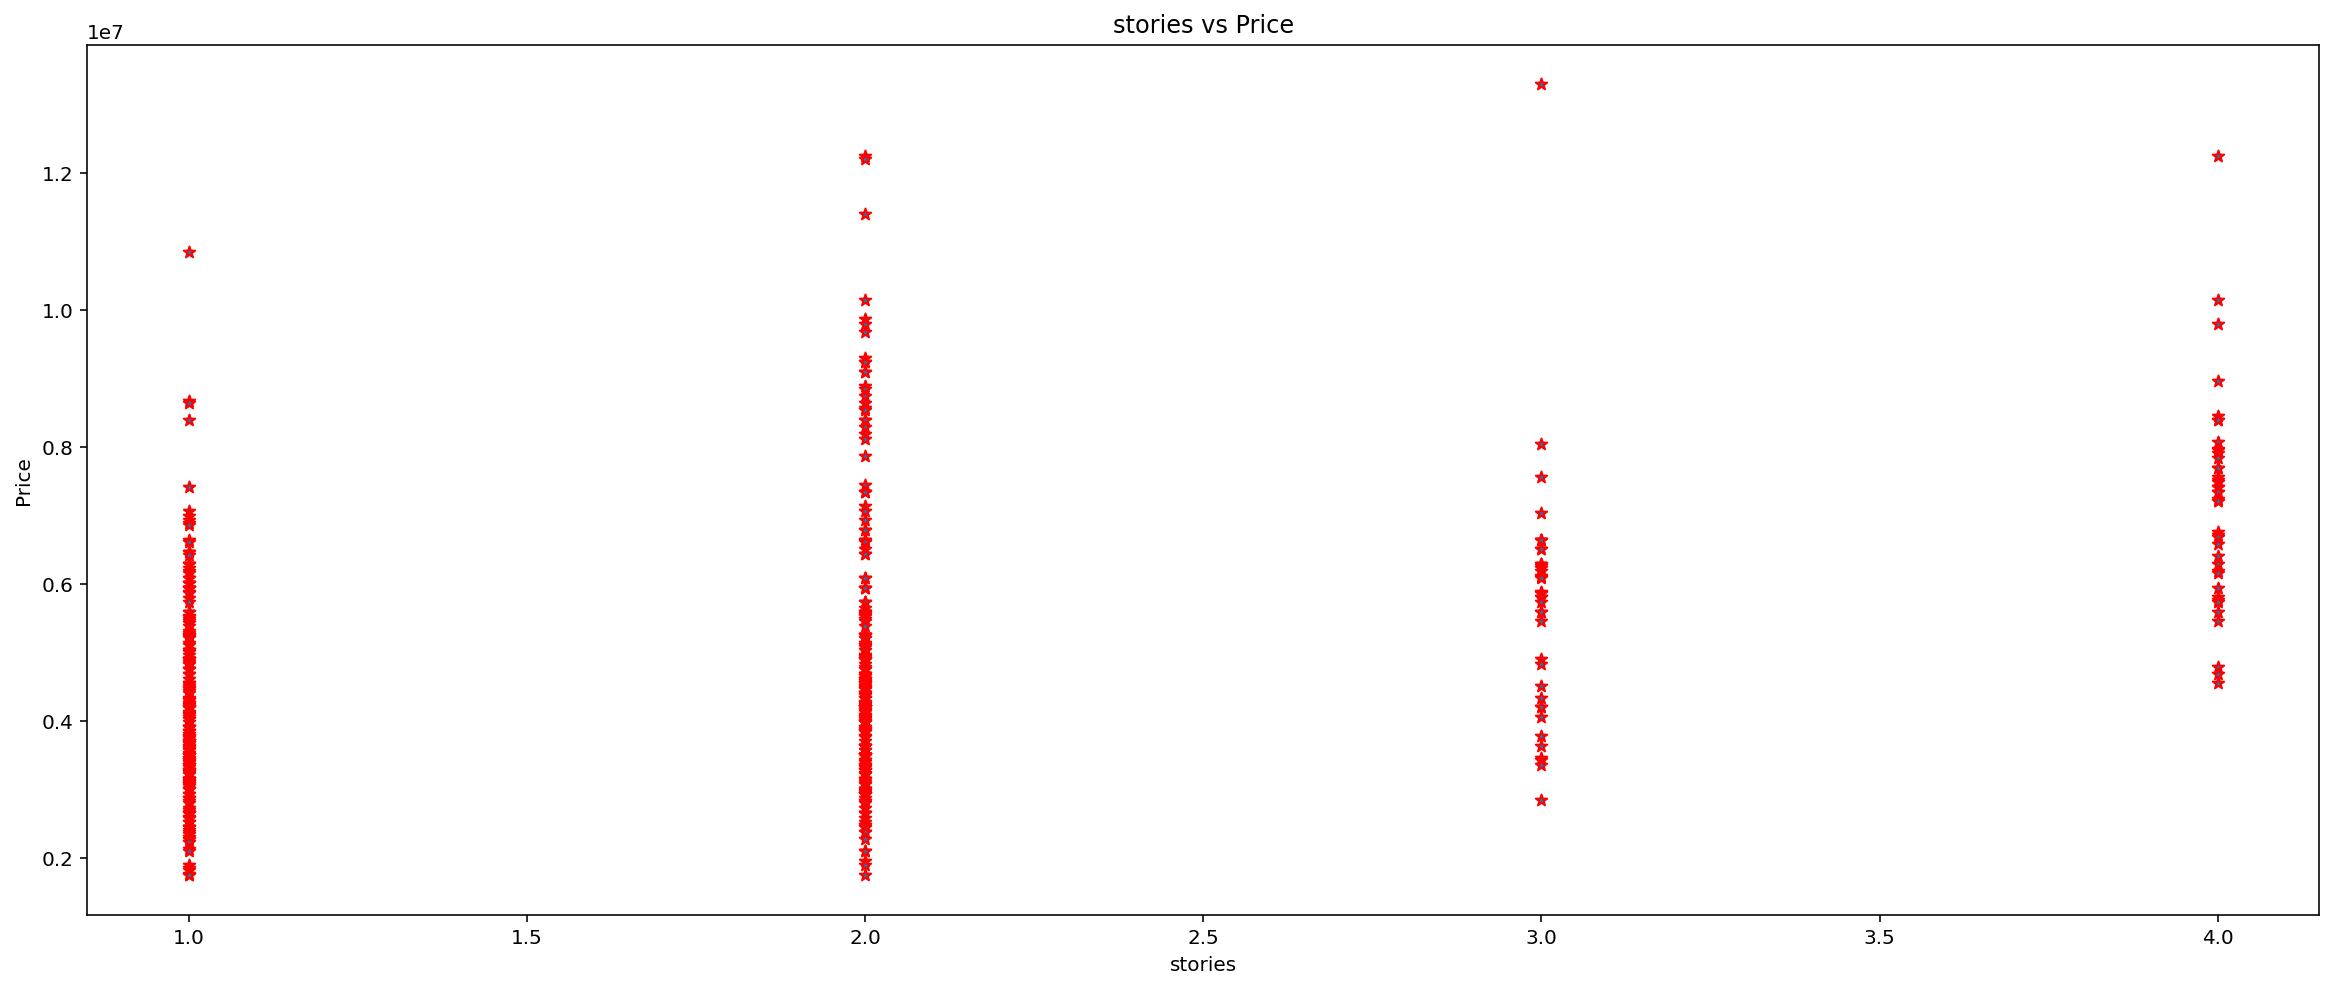

In [51]:
# Create scatter plot with 'stories' on X-axis and 'price' on Y-axis
plt.figure(figsize=(20,8),dpi=144)
plt.scatter(df['stories'],df['price'],marker='*',edgecolors='red')
plt.title('stories vs Price')
plt.xlabel('stories')
plt.ylabel('Price')
plt.show()


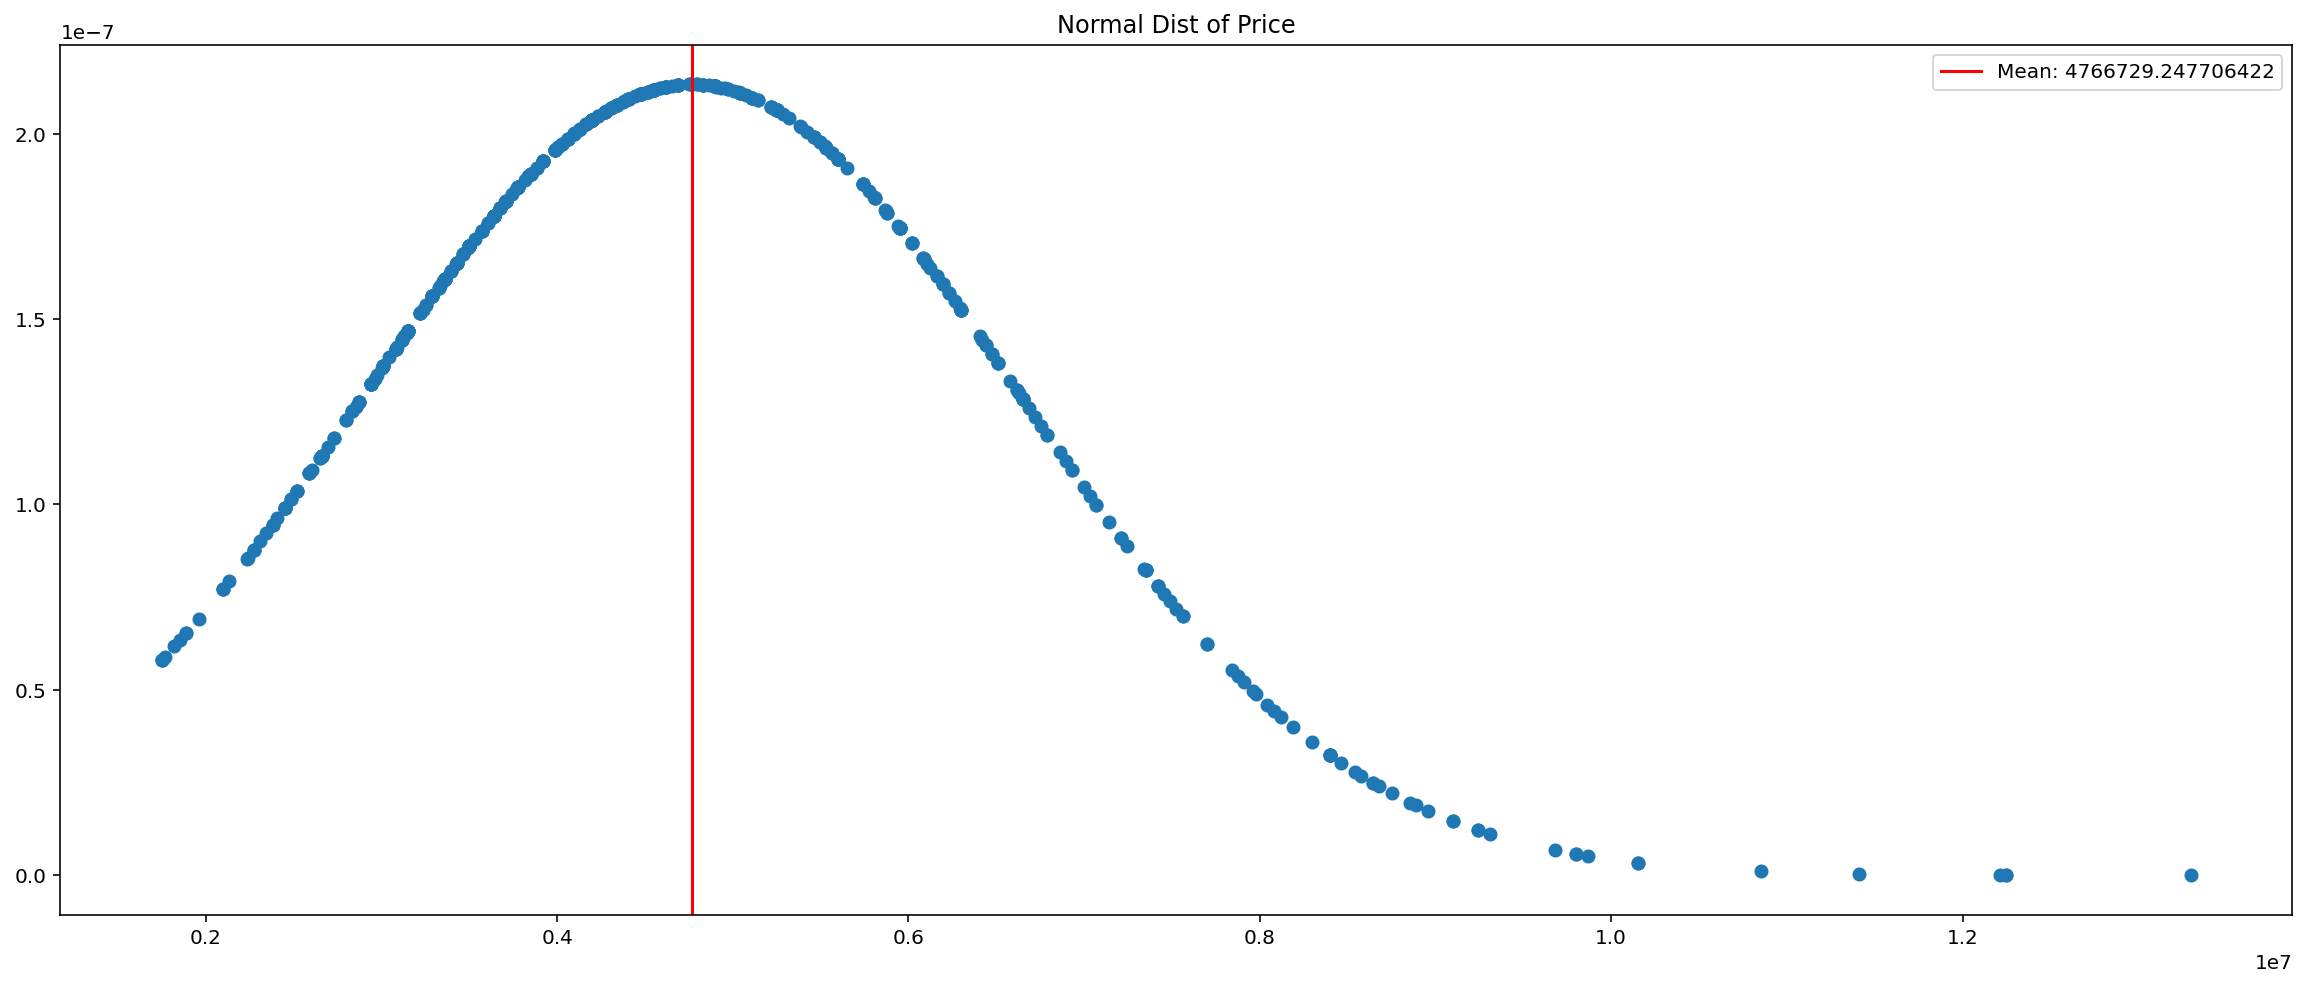

In [52]:
# Create a normal distribution curve for the 'price'.
# Create a probablity density function for plotting the normal distribution
y=df['price']
def pdf(val):
  coeff=1/(val.std()*np.sqrt(2*np.pi))
  power_of_e =-(val-val.mean())**2/(2*val.var())
  rho=coeff*np.exp(power_of_e)
  return rho
# Plot the normal distribution curve using plt.scatter() 
plt.figure(figsize=(20,8),dpi=144)
plt.scatter(x=y,y=pdf(y))
plt.title('Normal Dist of Price')
plt.axvline(y.mean(),label=f'Mean: {y.mean()}',color='red')
plt.legend()
plt.show()

---

#### 3. Feature encoding 

Perform feature encoding using `map()` function and one-hot encoding.

In [53]:
# Replace yes with 1 and no with 0 for all the values in features 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' using map() function.
words_dict={'yes':1,'no':0}
def match_map(series):
  return series.map(words_dict)
df[df_categorical.columns[:-1]]=df[df_categorical.columns[:-1]].apply(match_map,axis=1)


In [54]:
df_categorical

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [55]:
# Print dataframe
df.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [56]:
# Perform one hot encoding for furnishingstatus feature.
df_dummies=pd.get_dummies(df['furnishingstatus'],dtype=int)
df_clean=pd.concat([df,df_dummies],axis=1)
df_clean.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [57]:
# Drop 'furnishingstatus' feature
df_house=df_clean.drop('furnishingstatus',axis=1)

In [58]:
# Print dataframe 
df_house.head(7)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0


---

#### 4. Model Building and Evaluation 

Build a multiple linear regression model using the `statsmodels.api` module.

In [59]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
features=(df_house.columns).drop('price')
x=df_house[features]
y=df_house['price']


In [60]:
# Create separate data-frames for the feature and target variables for both the train and test sets.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)


In [61]:
# Build a linear regression model using all the features to predict prices.
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lin_reg_sm=sm.OLS(y_train,x_train_sm).fit()
lin_reg_sm.params


const             -5.637280e+04
area               2.532873e+02
bedrooms           8.089314e+04
bathrooms          1.114751e+06
stories            4.172676e+05
mainroad           4.080737e+05
guestroom          2.757105e+05
basement           4.826035e+05
hotwaterheating    6.163754e+05
airconditioning    6.858393e+05
parking            3.031112e+05
prefarea           5.091921e+05
furnished          1.521570e+05
semi-furnished     3.050437e+04
unfurnished       -2.390342e+05
dtype: float64

In [62]:
# Print the summary of the linear regression report.
print(lin_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.00e-85
Time:                        08:27:24   Log-Likelihood:                -5797.3
No. Observations:                 381   AIC:                         1.162e+04
Df Residuals:                     367   BIC:                         1.168e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.637e+04   2.04e+05     

In [63]:
# Calculate N and p values
N=x_train.shape[0]
p=x_train.shape[1]

In [64]:
# Calculate the adjusted R-square value.
r2_adjusted=1-((1-0.693)*(N-1))/(N-p-1)
print(f'adjusted R square is {r2_adjusted:.3f}')

adjusted R square is 0.681


**Q:** What is the Adjusted $R^2$ value?

**A:** 0.681


---

#### 5. Model Evaluation

Build a multiple linear regression model  using `sklearn` module. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.

In [69]:
# Build multiple linear regression model using all the features
from sklearn.linear_model import LinearRegression
y_train_reshape=y_train.values.reshape(-1,1)
lin_reg_skl=LinearRegression()
lin_reg_skl.fit(x_train,y_train_reshape)
print(f'intercept : {lin_reg_skl.intercept_[0]:.5f}')
for i in list(zip(x_train.columns.values,lin_reg_skl.coef_[0])):
  print(f'{i[0]}: {i[1]}')

intercept : -75163.73882
area: 253.28725231305367
bedrooms: 80893.14127100189
bathrooms: 1114751.1778269692
stories: 417267.5801083202
mainroad: 408073.68190660106
guestroom: 275710.5330517464
basement: 482603.521882233
hotwaterheating: 616375.4227186103
airconditioning: 685839.3455996527
parking: 303111.23633571446
prefarea: 509192.0888130876
furnished: 170947.9679284918
semi-furnished: 49295.3049281283
unfurnished: -220243.27285662002


In [71]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_train_pred=lin_reg_skl.predict(x_train)
print(f'R_squre value is {r2_score(y_train_reshape,y_train_pred):.3f}')
print(f'mean squared error value is {mean_squared_error(y_train_reshape,y_train_pred):.3f}')
print(f'RMSE is {np.sqrt(mean_squared_error(y_train_reshape,y_train_pred)):.3f}')
print(f'MAE is {mean_absolute_error(y_train_reshape,y_train_pred):.3f}')

R_squre value is 0.693
mean squared error value is 963835379828.360
RMSE is 981751.180
MAE is 720245.199


**Q:** What is the $R^2$ value for train set and test set?

**A:** 0.693

---

#### 6. Recursive Feature Elimination

Find out the best features out of all features using RFE and evaluate the model again.

In [78]:
# Create a Python dictionary storing the moderately to highly correlated features with price and the corresponding correlation values.
# Keep correlation threshold to be 0.2
major_features={}
for i in x_train.columns:
  corr_coef=np.corrcoef(y_train,x_train[i])[0,1]
  if corr_coef>=0.2 or corr_coef<=-0.2:
    major_features[i]=corr_coef
len(major_features)    

(381, 14)

In [79]:
# Perform RFE and select best 7 features  
from sklearn.feature_selection import RFE
rfe=RFE(lin_reg_skl,n_features_to_select=7).fit(x_train[major_features.keys()],y_train)
print(major_features.keys())
print(rfe.support_)
print(rfe.ranking_)


dict_keys(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea', 'furnished', 'unfurnished'])
[False False  True False  True  True  True  True  True  True False False]
[6 5 1 2 1 1 1 1 1 1 4 3]


In [81]:
# Print the 7 features selected by RFE in the previous step.
features_by_rfe=x_train[major_features.keys()].columns[rfe.support_]
features_by_rfe

Index(['bathrooms', 'mainroad', 'guestroom', 'basement', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')

In [94]:
# Build multiple linear regression model using all the features selected after RFE
x_by_rfe=df[features_by_rfe]
y=df['price']
# Split the DataFrame into the train and test sets such that test set has 33% of the values.
x_train,x_test,y_train,y_test=train_test_split(x_by_rfe,y,test_size=.33,random_state=42)
# Build linear regression model using the 'sklearn.linear_model' module.
y_train_reshape=y_train.values.reshape(-1,1)
y_test_reshape=y_test.values.reshape(-1,1)
# Print the value of the intercept
lin_reg_new=LinearRegression().fit(x_train,y_train_reshape)
# Print the names of the features along with the values of their corresponding coefficients.
print(f'intercept: {lin_reg_new.intercept_[0]}')
for i in list(zip(x_by_rfe.columns.values,lin_reg_new.coef_[0])):
  print(f'{i[0]}: {i[1]}')

intercept: 1056127.894827887
bathrooms: 1582073.4702731573
mainroad: 830540.0158707737
guestroom: 631938.3012290843
basement: 175810.4076474271
airconditioning: 1031492.6144060985
parking: 451500.09383611975
prefarea: 685328.9888254446


In [95]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_train_pred=lin_reg_new.predict(x_train)
print(f'R_squre value is {r2_score(y_train_reshape,y_train_pred):.3f}')
print(f'RMSE is {np.sqrt(mean_squared_error(y_train_reshape,y_train_pred)):.3f}')
print(f'mean squared error value is {mean_squared_error(y_train_reshape,y_train_pred):.3f}')
print(f'MAE is {mean_absolute_error(y_train_reshape,y_train_pred):.3f}')

R_squre value is 0.572
RMSE is 1151046.750
mean squared error value is 1324908621776.950
MAE is 860110.719


---

#### 7. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not. For this, plot the  histogram of the residuals.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


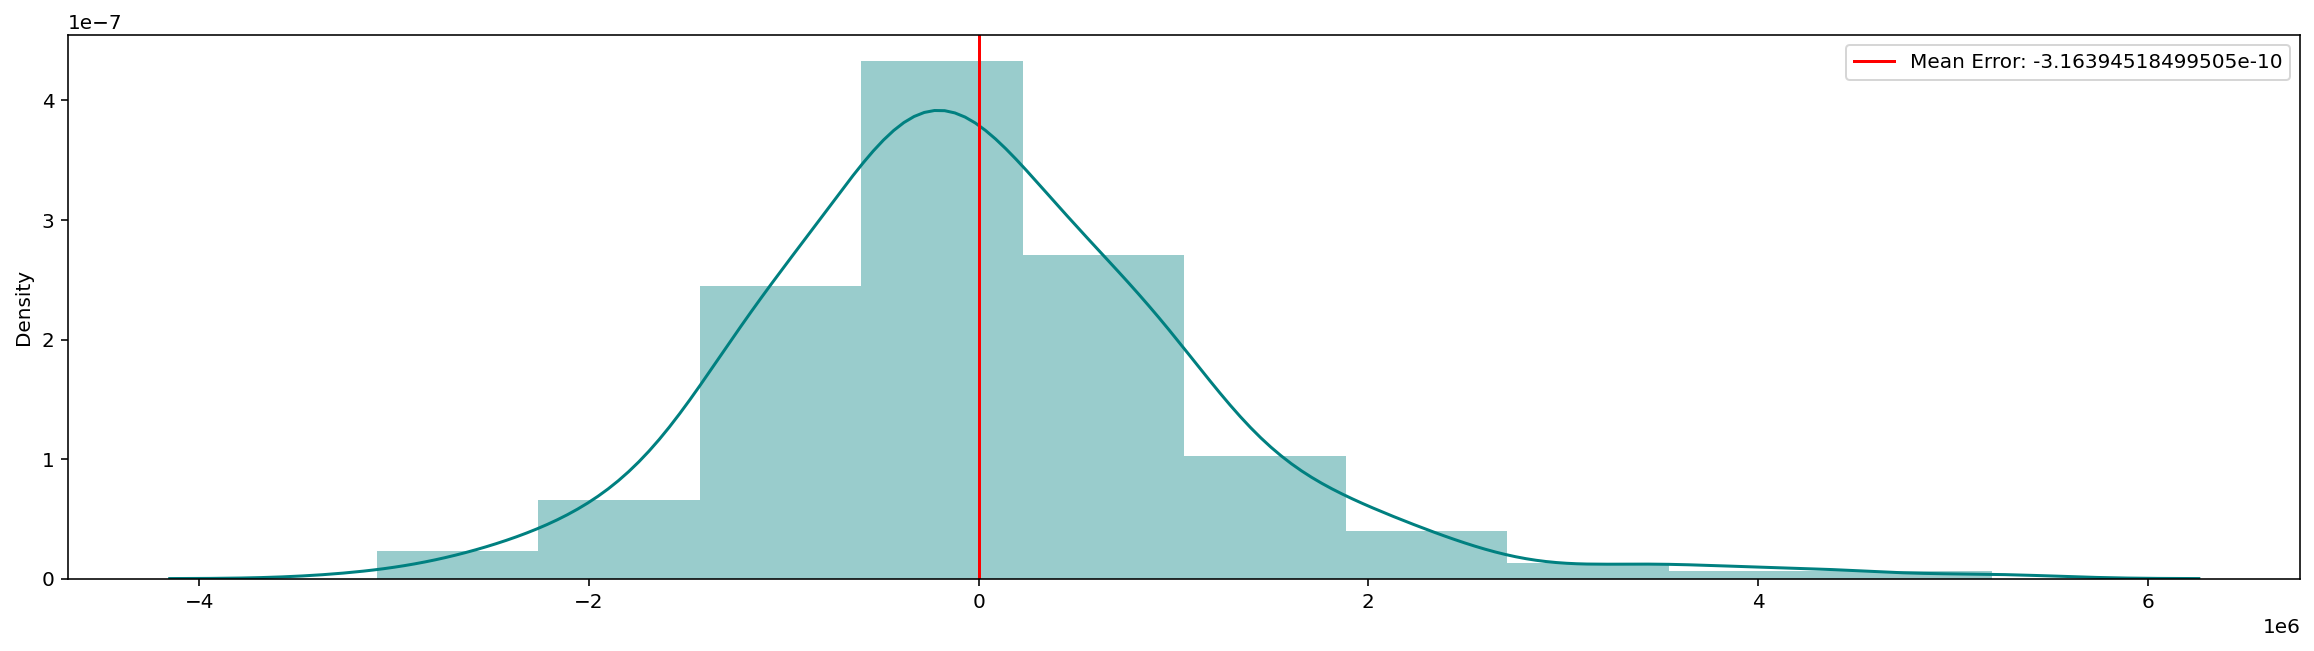

In [96]:
# Create a histogram for the errors obtained in the predicted values for the train set.
error_train=y_train_reshape-y_train_pred
plt.figure(figsize=(20,5),dpi=144)
sns.distplot(error_train,bins='sturges',color='teal')
plt.axvline(error_train.mean(),label=f'Mean Error: {error_train.mean()}',color='red')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


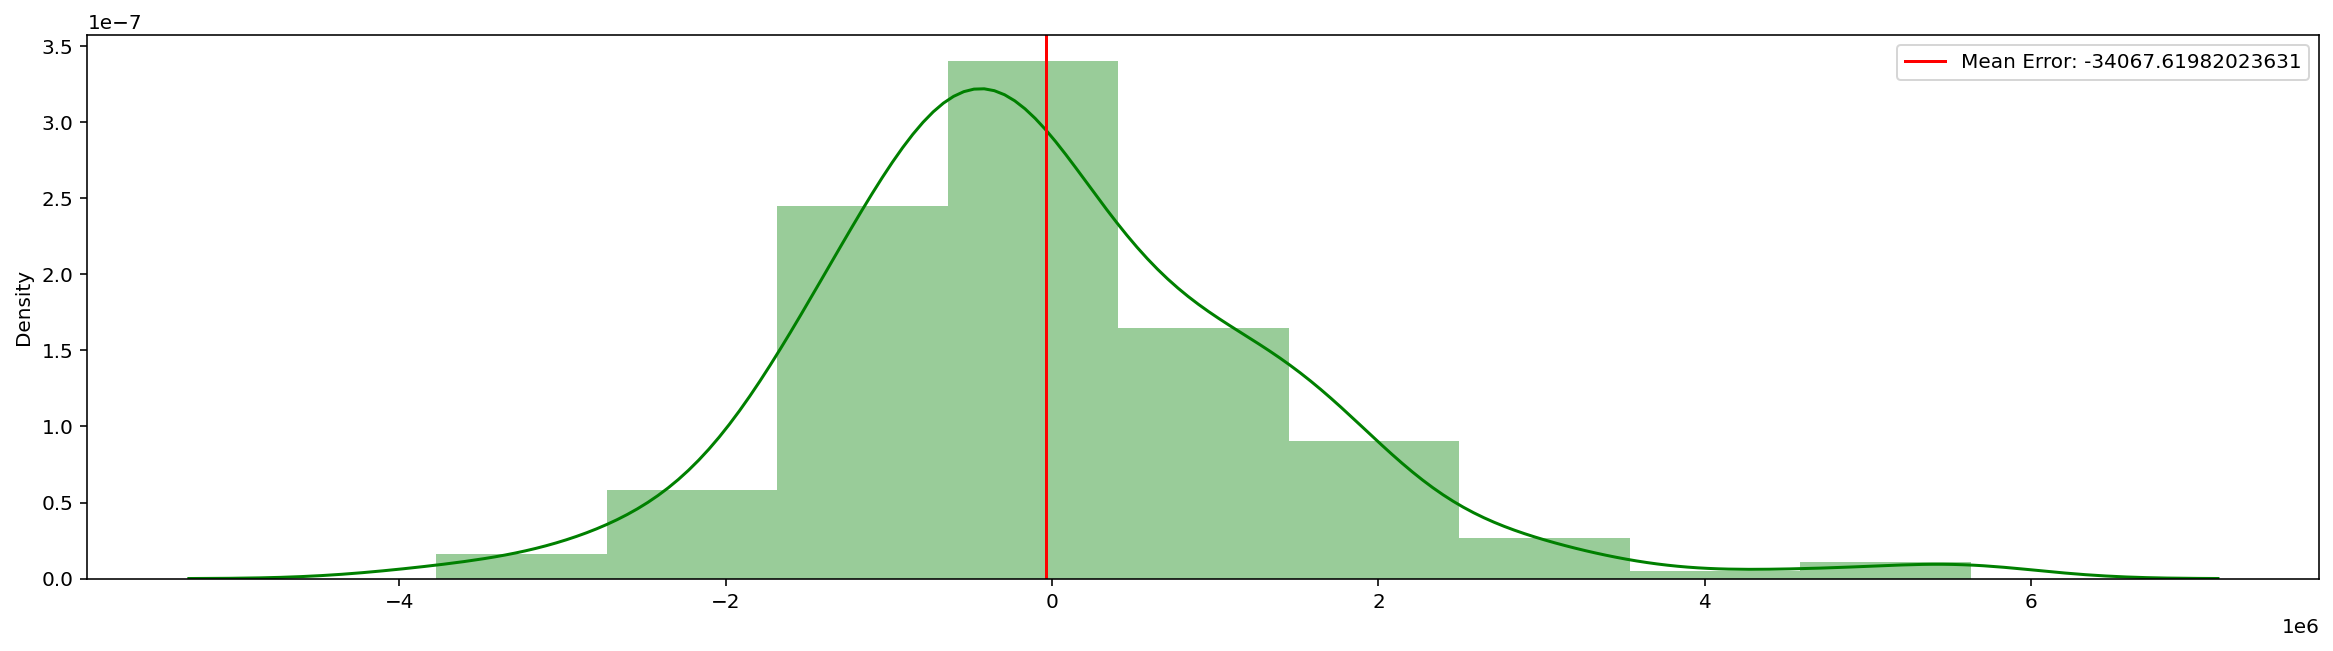

In [98]:
# Create a histogram for the errors obtained in the predicted values for the test set.
y_test_pred=lin_reg_new.predict(x_test)
error_test=y_test_reshape-y_test_pred
plt.figure(figsize=(20,5),dpi=144)
sns.distplot(error_test,bins='sturges',color='green')
plt.axvline(error_test.mean(),label=f'Mean Error: {error_test.mean()}',color='red')
plt.legend()
plt.show()

---

#### 8. Verify Homoscedasticity 

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

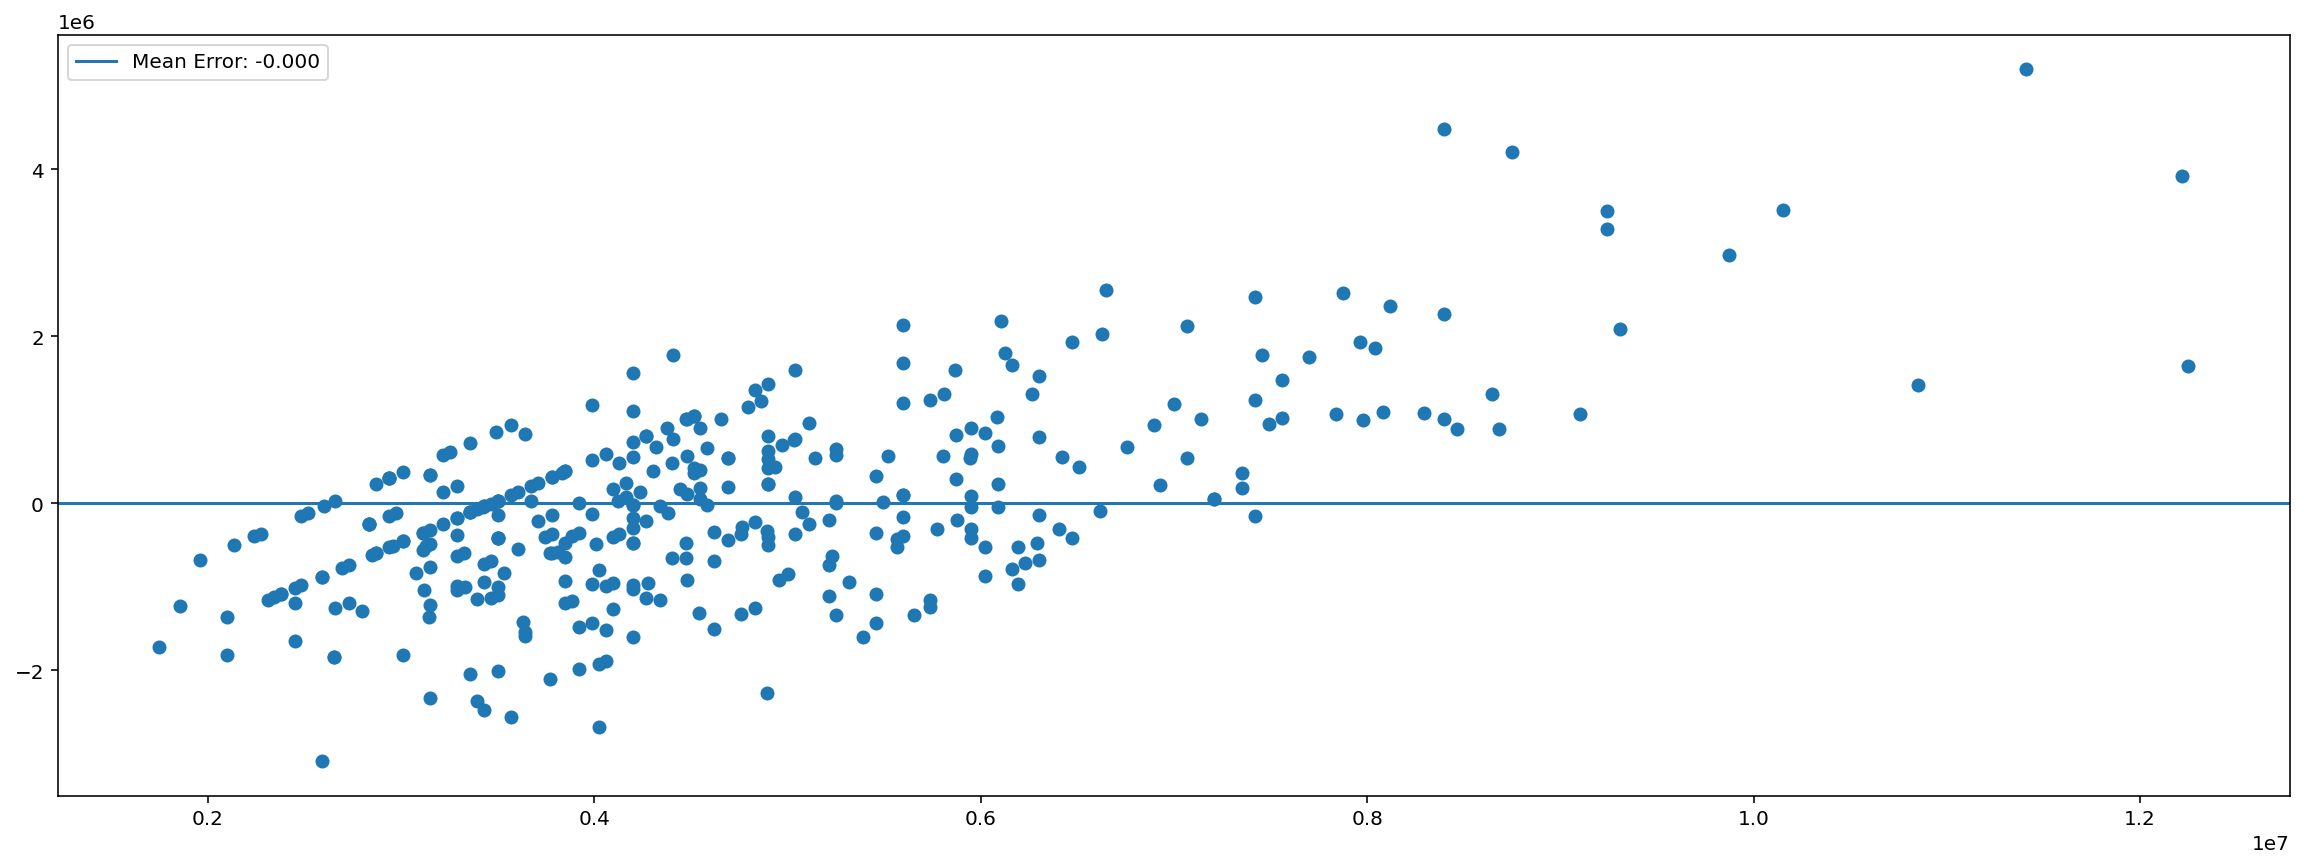

In [99]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize=(20,7),dpi=144)
plt.scatter(x=y_train,y=error_train)
plt.axhline(error_train.mean(),label=f'Mean Error: {error_train.mean():.3f}')
plt.legend()
plt.show()

---

### Submitting the Project

Follow the steps described below to submit the project.

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>


3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_CapstoneProject17**) of the notebook will get copied 

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_CapstoneProject17** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>


---